# <center> Big Data Fundamentals - Data Storage Networking </center>
## <center> CBD 2214 - Group 01 </center>
## <center> Assignment 1 - Machine Learning Regression Algorithm </center>

![](https://storage.googleapis.com/kaggle-datasets-images/1603567/2637023/34e8940b0d9e709327b32265744a3587/dataset-cover.jpg?t=2021-09-21-16-55-27)

## <center> Music Albums Popularity Prediction </center>

<left> 

**CONTEXT**

Spotify provides an API service that allows us to access data from their archive of millions of songs. Their API gives the users the ability to download all the possible information about Albums, Episodes, Playlists, Tracks, Users, etc. These features include attributes such as a song’s tempo, level of acoustics, how danceable a song is, and many more similar ones.

**ATTRIBUTES**

- **ID**: A unique identifier for every row
- **Name**: Name of the album
- **Release Date**: Release date of the album
- **Artists**: All the artists of the album
- **Total_tracks**: Number of total tracks of the album
- **T_name**: Name of the track
- **Duration**: Duration of the track (in ms)
- **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements. A value of 0.0 is least danceable and 1.0 is the most danceable.
- **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- **Key**: The key the track is in. Integers map to pitches using standard Pitch
- **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.-
- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **Instrumentalness**: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **Time Signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**BENEFICIARES**

- Music production companies like Universal Music Group, Sony Music Entertainment, T-Series, etc, are some of the probable beneficiaries of this analysis.
- If they somehow get to know that say danceability helps to increase the popularity of the album, then they can think about producing albums with such tracks.
- Consider another situation in which they got to know that inclusion of tracks of a certain artist can help increase the popularity of an album, and hence, they would approach such artists more.
- Music applications like Spotify, Prime Music, Deezer, YouTube Music, SoundCloud, etc can also benefit from this kind of analysis. In the current scenario, the popularity is calculated on the basis of number of likes, number of playbacks, etc.
- But if these apps can acquire the information about these attributes of albums from say, music critics, artists themselves, etc, then they can predict the albums which are more likely to be popular in the near future, and hence, can focus on promoting such albums to a greater extent. </left>

## 1. Data Preparation

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load dataset into notebook
train_df = pd.read_csv(r"train.csv")

# This test dataset is for submission, no label results given.
test_df = pd.read_csv(r"test.csv")

In [3]:
train_df.head()

id                           name release_date  \
0   0             Ya Solo Eres Mi Ex   2021-09-09   
1   1                         Nibiru   2019-11-29   
2   2                          DAMN.   2017-04-14   
3   3  Did I Shave My Legs For This?   1996-01-01   
4   4                        glisten   2018-05-04   

                                    artists  total_tracks  \
0  La Adictiva Banda San José de Mesillas,              7   
1                                   Ozuna,             18   
2                          Kendrick Lamar,             14   
3                            Deana Carter,             11   
4                           Jeremy Zucker,              4   

                      t_name0                 t_name1                 t_name2  \
0          Ya Solo Eres Mi Ex            La Malagueña  México Lindo y Querido   
1                      Nibiru  Hasta Que Salga el Sol                Temporal   
2                      BLOOD.                    DNA.                    YAH.   
3   I've Loved Enough To Know        We Danced Anyway             Count Me In   
4  all the kids are depressed                wildfire     glisten (interlude)   

   t_dur0    t_dur1  ...  t_val0  t_val1  t_val2  t_tempo0  t_tempo1  \
0  222133  189133.0  ...   0.626   0.878   0.833    74.924   126.970   
1  158826  188480.0  ...   0.158   0.598   0.484   173.023    96.042   
2  118066  185946.0  ...   0.494   0.422   0.648   156.907   139.913   
3  203693  202533.0  ...   0.755   0.651   0.263   120.285    94.054   
4  169973  163000.0  ...   0.707   0.426   0.466   103.861   129.170   

   t_tempo2  t_sig0  t_sig1  t_sig2  popularity  
0   197.836     4.0     3.0     3.0          51  
1   148.019     4.0     4.0     4.0          67  
2    69.986     4.0     4.0     4.0          81  
3   130.011     4.0     4.0     4.0          53  
4   116.349     4.0     4.0     4.0          70  

[5 rows x 45 columns]

In [4]:
test_df.tail()

id                                               name release_date  \
21202  181202                                    Watermelon Hero   2021-07-23   
21203  181203                                          Fibonacci   2018-03-04   
21204  181204  Rewrite The Stars (with James Arthur & Anne-Ma...   2018-10-25   
21205  181205                                     Mixed Emotions   2019-11-15   
21206  181206                                         Who's Next   1971-08-14   

                          artists  total_tracks  \
21202                TisaKorean,              1   
21203               Malz Monday,              1   
21204  James Arthur, Anne-Marie,              1   
21205                   Luh Kel,             12   
21206                   The Who,             29   

                                                 t_name0     t_name1  \
21202                                    Watermelon Hero         NaN   
21203                                          Fibonacci         NaN   
21204  Rewrite The Stars (with James Arthur & Anne-Ma...         NaN   
21205                                               Hero  Cold Heart   
21206                                       Baba O'Riley     Bargain   

                      t_name2  t_dur0    t_dur1  ...  t_live2  t_val0  t_val1  \
21202                     NaN  100179       NaN  ...      NaN   0.645     NaN   
21203                     NaN  159503       NaN  ...      NaN   0.642     NaN   
21204                     NaN  218293       NaN  ...      NaN   0.571     NaN   
21205                   Wrong  127164  134688.0  ...    0.228   0.756   0.637   
21206  Love Ain't For Keeping  300400  333586.0  ...    0.341   0.150   0.336   

       t_val2  t_tempo0  t_tempo1  t_tempo2  t_sig0  t_sig1  t_sig2  
21202     NaN    72.059       NaN       NaN     4.0     NaN     NaN  
21203     NaN   176.344       NaN       NaN     4.0     NaN     NaN  
21204     NaN   125.944       NaN       NaN     4.0     NaN     NaN  
21205   0.390   149.840   129.882   120.099     4.0     4.0     4.0  
21206   0.512   117.292   133.883   142.339     4.0     4.0     4.0  

[5 rows x 44 columns]

## 2. Exploration Data Analysis

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            160000 non-null  int64  
 1   name          160000 non-null  object 
 2   release_date  160000 non-null  object 
 3   artists       160000 non-null  object 
 4   total_tracks  160000 non-null  int64  
 5   t_name0       160000 non-null  object 
 6   t_name1       112284 non-null  object 
 7   t_name2       108467 non-null  object 
 8   t_dur0        160000 non-null  int64  
 9   t_dur1        112284 non-null  float64
 10  t_dur2        108467 non-null  float64
 11  t_dance0      159786 non-null  float64
 12  t_dance1      112159 non-null  float64
 13  t_dance2      108390 non-null  float64
 14  t_energy0     159786 non-null  float64
 15  t_energy1     112159 non-null  float64
 16  t_energy2     108390 non-null  float64
 17  t_key0        159786 non-null  float64
 18  t_ke

In [6]:
# Check the original shapes of both training and test data
train_df.shape, test_df.shape

((160000, 45), (21207, 44))

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21207 entries, 0 to 21206
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21207 non-null  int64  
 1   name          21206 non-null  object 
 2   release_date  21207 non-null  object 
 3   artists       21207 non-null  object 
 4   total_tracks  21207 non-null  int64  
 5   t_name0       21206 non-null  object 
 6   t_name1       14919 non-null  object 
 7   t_name2       14417 non-null  object 
 8   t_dur0        21207 non-null  int64  
 9   t_dur1        14919 non-null  float64
 10  t_dur2        14417 non-null  float64
 11  t_dance0      21171 non-null  float64
 12  t_dance1      14905 non-null  float64
 13  t_dance2      14411 non-null  float64
 14  t_energy0     21171 non-null  float64
 15  t_energy1     14905 non-null  float64
 16  t_energy2     14411 non-null  float64
 17  t_key0        21171 non-null  float64
 18  t_key1        14905 non-nu

### Exploring data types and its count

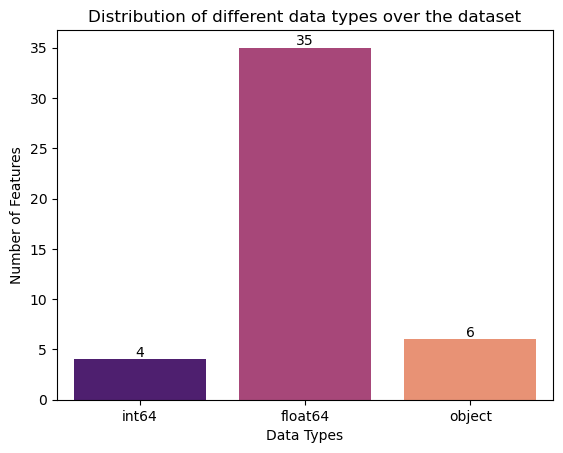

In [8]:
# Find the number of features based on their data types
data_types = ['int64', 'float64', 'object']
num_lst = [0,0,0]

for v in train_df.dtypes:
    if v == 'int64':
        num_lst[0] += 1
    elif v == 'float64':
        num_lst[1] += 1
    elif v == 'object':
        num_lst[2] += 1

# Plotting the graph showing the difference between data types
plot = sns.barplot(x = data_types, y = num_lst, palette = 'magma')

# Show value for each bar in the graph
plot.bar_label(plot.containers[0])

plt.title('Distribution of different data types over the dataset')
plt.xlabel('Data Types')
plt.ylabel('Number of Features')
plt.show()

<div class="alert alert-block alert-warning">
<b>Note: </b> 

- Dataset consists the majority of numerical features (39)
- These numerical features actually **id** and **popularity** columns and we also have 6 non-numerical features

</div>

#### 1. OBJECT Type

In [9]:
train_df.select_dtypes(include = ['object']).describe()

name release_date            artists t_name0 t_name1  \
count                160000       160000             160000  160000  112284   
unique                66433         7574              46374   62610   38406   
top     Certified Lover Boy   2021-09-03  Various Artists,    Intro   Naked   
freq                    173         1695               3521    3105     185   

                          t_name2  
count                      108467  
unique                      36436  
top     Payday (feat. Young Thug)  
freq                          183

<div class="alert alert-block alert-warning">
<b>Note: </b> 

- These object features do show that there are some albums which are having **duplicated rows** -> Need to have a look and remove duplicated if needed
- **t_name1 and t_name2** are having missing values which should be addressed if neccessary 
- These object features except **release_date** are not actually giving any further insights to predict the popularity of an album -> We might consider to remove them later
- Release Date is a good feature for us to have a closer look at the trend of popularity -> This should be converted back to **Datetime** dtype for further exploration
</div>

In [10]:
# Explore the distribution of music albums over the release year

# Create a new Year column to explore this
train_df['year'] = [(str(v).split('-')[0]) for v in train_df['release_date']]
train_df.head()

id                           name release_date  \
0   0             Ya Solo Eres Mi Ex   2021-09-09   
1   1                         Nibiru   2019-11-29   
2   2                          DAMN.   2017-04-14   
3   3  Did I Shave My Legs For This?   1996-01-01   
4   4                        glisten   2018-05-04   

                                    artists  total_tracks  \
0  La Adictiva Banda San José de Mesillas,              7   
1                                   Ozuna,             18   
2                          Kendrick Lamar,             14   
3                            Deana Carter,             11   
4                           Jeremy Zucker,              4   

                      t_name0                 t_name1                 t_name2  \
0          Ya Solo Eres Mi Ex            La Malagueña  México Lindo y Querido   
1                      Nibiru  Hasta Que Salga el Sol                Temporal   
2                      BLOOD.                    DNA.                    YAH.   
3   I've Loved Enough To Know        We Danced Anyway             Count Me In   
4  all the kids are depressed                wildfire     glisten (interlude)   

   t_dur0    t_dur1  ...  t_val1  t_val2  t_tempo0  t_tempo1  t_tempo2  \
0  222133  189133.0  ...   0.878   0.833    74.924   126.970   197.836   
1  158826  188480.0  ...   0.598   0.484   173.023    96.042   148.019   
2  118066  185946.0  ...   0.422   0.648   156.907   139.913    69.986   
3  203693  202533.0  ...   0.651   0.263   120.285    94.054   130.011   
4  169973  163000.0  ...   0.426   0.466   103.861   129.170   116.349   

   t_sig0  t_sig1  t_sig2  popularity  year  
0     4.0     3.0     3.0          51  2021  
1     4.0     4.0     4.0          67  2019  
2     4.0     4.0     4.0          81  2017  
3     4.0     4.0     4.0          53  1996  
4     4.0     4.0     4.0          70  2018  

[5 rows x 46 columns]

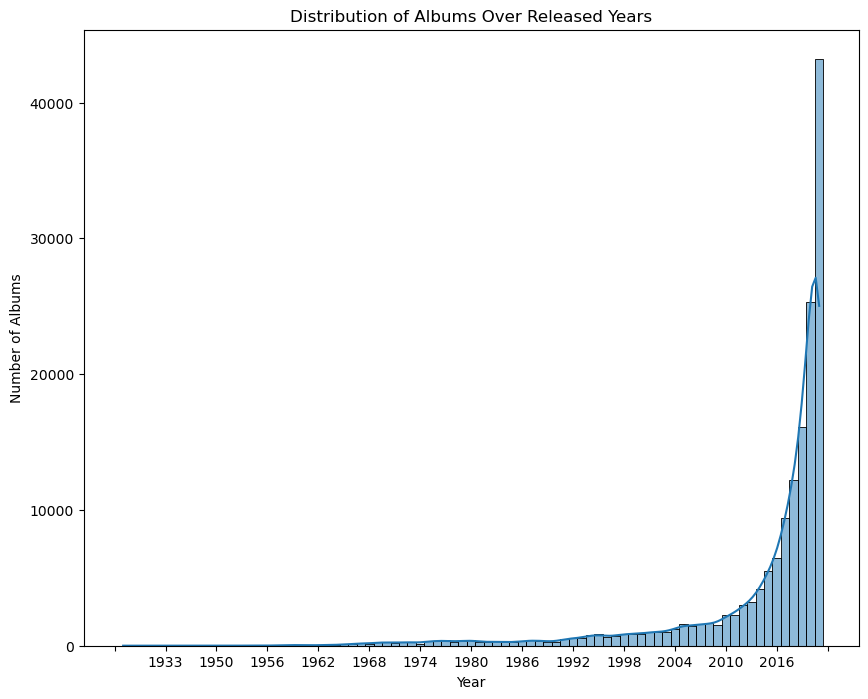

In [11]:
import matplotlib.dates as mdates

# Plottng the distribution of albums over the years
plt.figure(figsize=(10, 8))
chart = sns.histplot(x= train_df["year"].sort_values(), kde=True, bins = 12, binwidth = 20)

plt.title('Distribution of Albums Over Released Years')
plt.xlabel('Year')
plt.ylabel('Number of Albums')

locator = mdates.DayLocator(interval=6)
chart.xaxis.set_major_locator(locator)
plt.show()

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- Most of the albums in our dataset are from the period 1998 - 2022
- Also, it is obvious that our dataset is highly skewed, if we use the release_date of the albums as the plotting feature.
- In addition, our dataset also contains a bunch of outliers, which can be removed on regarding the release_date. Clearly, we can see that the number of released albums before 1968 is significantly less which would not bring great insights for further analysis.
</div>

In [12]:
# Explore the artist names by Word Cloud to see any insight
artist_name_text = ''

for v in train_df['artists']:
    artist_name_text += v

In [13]:
artist_name_text

'La Adictiva Banda San José de Mesillas, Ozuna, Kendrick Lamar, Deana Carter, Jeremy Zucker, Alexander 23, Various Artists, ODP_Scino, Creedence Clearwater Revival, Wu-Tang Clan, M&S, The Girl Next Door, DJ Snake, Dhee, Drake, KA$HDAMI, Future, Dua Lipa, The Blessed Madonna, Skofee, Gerald Kenneth Turner, YNW Melly, Morgan Wallen, XXXTENTACION, Lil Peep, Tmsoft’s White Noise Sleep Sounds, Metallica, Maejor, Kenndog, Waxahatchee, Dustin Lynch, 6ix9ine, Kygo, Fleetwood Mac, Olivia Rodrigo, Maccabi Hatzair, CeeLo Green, Sheff G, VWRLD, Post Malone, Roy Woods, EBK Jaaybo, Relampaguitos, Victoria Monét, DaBaby, Protest The Hero, J Balvin, Bad Bunny, BriGuel, Justin Bieber, The Mountain Goats, XFilesX, Jacob Collier, Metropole Orkest, Jules Buckley, Baimz, Saosin, YNW Melly, Eric Church, R. Kelly, Young Dolph, Paper Route EMPIRE, Future, Various Artists, The Neighbourhood, ZJxmes8x, Sleepy John, Tenacious D, beabadoobee, Oscar Lang, CORPSE, Savage Ga$p, 6ix9ine, Fetty Wap, A Boogie Wit da Ho

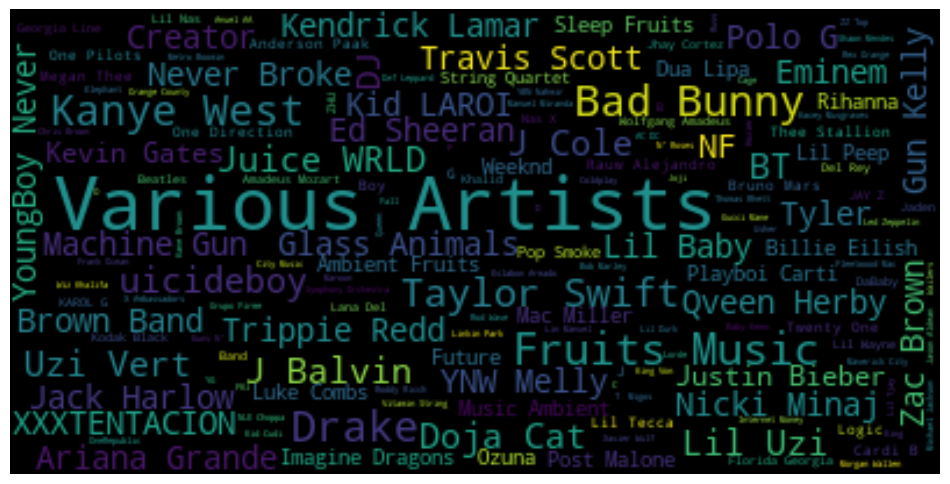

In [14]:
# Create and generate a word cloud image:
from wordcloud import WordCloud

plt.figure(figsize=(12, 10))
wordcloud = WordCloud().generate(artist_name_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- Up to this stage of representation of artist names, we can see that there are lots of albums with "Various Artists", along with some of popular artists such as Taylor Swift, Justin bieber, Kanye West, Ed Sheeran, Ariana Grande and much more.
- Apart from seeing all these names, we haven't picked up any useful insights that would contribute to the popularity prediction while exploiting this feature.
- This also would be same for **name (Album's Name), t_name0, t_name1, t_name2 (Tracks' names)**, not giving any useful insight for popularity prediction

**--> We might consider dropping all these columns**
</div>

#### 2. NUMERICAL DATA TYPES

In [15]:
# Check the statistics summary for the training data
train_df.drop(columns = ['id', 'popularity'], axis = 1).select_dtypes(exclude = ['object']).describe().T

count           mean            std     min          25%  \
total_tracks  160000.0      11.004150      23.007852     1.0       1.0000   
t_dur0        160000.0  199134.586900  116074.058224  1485.0  150804.0000   
t_dur1        112284.0  213513.222106  111209.906524  4120.0  168831.2500   
t_dur2        108467.0  214322.815916   98681.201002  4285.0  169319.0000   
t_dance0      159786.0       0.606401       0.184056     0.0       0.4900   
t_dance1      112159.0       0.608607       0.177404     0.0       0.4990   
t_dance2      108390.0       0.609624       0.179375     0.0       0.5000   
t_energy0     159786.0       0.605095       0.236601     0.0       0.4580   
t_energy1     112159.0       0.628722       0.232821     0.0       0.4890   
t_energy2     108390.0       0.616425       0.231022     0.0       0.4770   
t_key0        159786.0       5.216483       3.585813     0.0       2.0000   
t_key1        112159.0       5.206430       3.626339     0.0       2.0000   
t_key2        108390.0       5.279795       3.571598     0.0       2.0000   
t_mode0       159786.0       0.607406       0.488329     0.0       0.0000   
t_mode1       112159.0       0.631639       0.482362     0.0       0.0000   
t_mode2       108390.0       0.626884       0.483635     0.0       0.0000   
t_speech0     159786.0       0.133863       0.147290     0.0       0.0409   
t_speech1     112159.0       0.118143       0.130046     0.0       0.0394   
t_speech2     108390.0       0.119741       0.132692     0.0       0.0388   
t_acous0      159786.0       0.297695       0.313269     0.0       0.0310   
t_acous1      112159.0       0.266738       0.301562     0.0       0.0202   
t_acous2      108390.0       0.275296       0.304333     0.0       0.0262   
t_ins0        159786.0       0.144891       0.304190     0.0       0.0000   
t_ins1        112159.0       0.134618       0.295171     0.0       0.0000   
t_ins2        108390.0       0.133054       0.293105     0.0       0.0000   
t_live0       159786.0       0.200705       0.167700     0.0       0.0976   
t_live1       112159.0       0.196960       0.163402     0.0       0.0973   
t_live2       108390.0       0.190308       0.154971     0.0       0.0983   
t_val0        159786.0       0.468572       0.255854     0.0       0.2610   
t_val1        112159.0       0.493100       0.249949     0.0       0.2990   
t_val2        108390.0       0.485054       0.252814     0.0       0.2890   
t_tempo0      159786.0     119.736980      31.188965     0.0      95.5140   
t_tempo1      112159.0     121.096000      30.459428     0.0      96.7000   
t_tempo2      108390.0     120.600622      30.928580     0.0      96.0000   
t_sig0        159786.0       3.896737       0.510577     0.0       4.0000   
t_sig1        112159.0       3.909735       0.436034     0.0       4.0000   
t_sig2        108390.0       3.902546       0.465309     0.0       4.0000   

                        50%           75%           max  
total_tracks      10.000000      14.00000  1.190000e+03  
t_dur0        192052.000000  233600.00000  1.082819e+07  
t_dur1        203626.000000  242652.50000  7.054236e+06  
t_dur2        206440.000000  244973.00000  6.145123e+06  
t_dance0           0.630000       0.74500  9.880000e-01  
t_dance1           0.631000       0.73700  9.920000e-01  
t_dance2           0.628000       0.74300  9.820000e-01  
t_energy0          0.633000       0.79200  1.000000e+00  
t_energy1          0.660000       0.81100  1.000000e+00  
t_energy2          0.648000       0.79200  1.000000e+00  
t_key0             5.000000       8.00000  1.100000e+01  
t_key1             5.000000       8.00000  1.100000e+01  
t_key2             5.000000       8.00000  1.100000e+01  
t_mode0            1.000000       1.00000  1.000000e+00  
t_mode1            1.000000       1.00000  1.000000e+00  
t_mode2            1.000000       1.00000  1.000000e+00  
t_speech0          0.066200       0.17400  9.680000e-01  
t_speech1          0.060300       0.14600  9.7

In [16]:
skew_df = train_df.drop(columns = ['id'], axis = 1).skew(axis = 0).reset_index().rename(columns = {'index': 'Feature', 0: 'Skewness'})
skew_df[(skew_df['Skewness'] > 3) | (skew_df['Skewness'] < -3)]

C:\Users\HP\AppData\Local\Temp\ipykernel_10280\4277751527.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_df = train_df.drop(columns = ['id'], axis = 1).skew(axis = 0).reset_index().rename(columns = {'index': 'Feature', 0: 'Skewness'})


Feature   Skewness
0   total_tracks  25.903599
1         t_dur0  16.131179
2         t_dur1  20.054749
3         t_dur2  10.778669
34        t_sig0  -4.025320
35        t_sig1  -4.173312
36        t_sig2  -4.362995
38          year -73.384045

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- From Statistical Summary, we can see that all features except **total_tracks, t_dur (Track Duration), t_tempo, and t_sig** have pretty much similar scale from 0 to 1 **-> We might think of rescaling these features if we use them for further analysis**
- From the Skewness Table and Interquartile Range, there are some features having outliers which cause positive and negative skewness for our data **-> We might think of handling Outliersfor these cases**
</div>

#####  Explore the Total_tracks

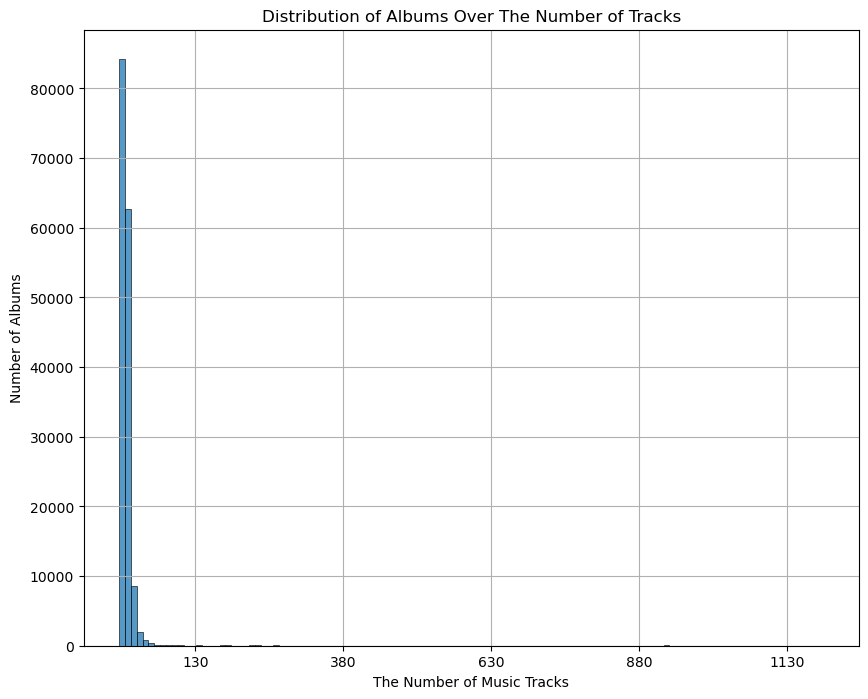

In [17]:
# Plottng the distribution of albums over different numbers of tracks
plt.figure(figsize=(10, 8))
chart = sns.histplot(x= train_df["total_tracks"].sort_values(), kde=False, bins = 24, binwidth = 10)

plt.title('Distribution of Albums Over The Number of Tracks')
plt.xlabel('The Number of Music Tracks')
plt.ylabel('Number of Albums')
plt.grid()

locator = mdates.DayLocator(interval= 250)
chart.xaxis.set_major_locator(locator)
plt.show()

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- The majority of the albums in our dataset have less than 50 music tracks, specifically 75% of albums have less than 14 music tracks (from Statistics Summary)
- Also, it is obvious that our dataset is highly skewed, if we use the total_tracks of the albums as the plotting feature (Skew = 25.9)
- In addition, our dataset also contains a bunch of outliers, which can be removed on regarding the total_tracks. Clearly, we can see that the number of released albums having more than 100 tracks is significantly less which would distort our analysis
</div>

##### Explore tracks' durations

In [18]:
# Convert track_duration from miliseconds to minutes
track_duration = train_df[['t_dur0', 't_dur1', 't_dur2']]/60000

In [19]:
track_duration['average_duration'] = track_duration.mean(axis = 1, skipna = True)
track_duration

t_dur0    t_dur1    t_dur2  average_duration
0       3.702217  3.152217  2.759767          3.204733
1       2.647100  3.141333  3.971550          3.253328
2       1.967767  3.099100  2.671550          2.579472
3       3.394883  3.375550  3.422883          3.397772
4       2.832883  2.716667  1.485100          2.344883
...          ...       ...       ...               ...
159995  2.002667  2.636217  2.659767          2.432883
159996  2.684350       NaN       NaN          2.684350
159997  2.876433  3.021100  2.855550          2.917694
159998  2.237750       NaN       NaN          2.237750
159999  2.109083       NaN       NaN          2.109083

[160000 rows x 4 columns]

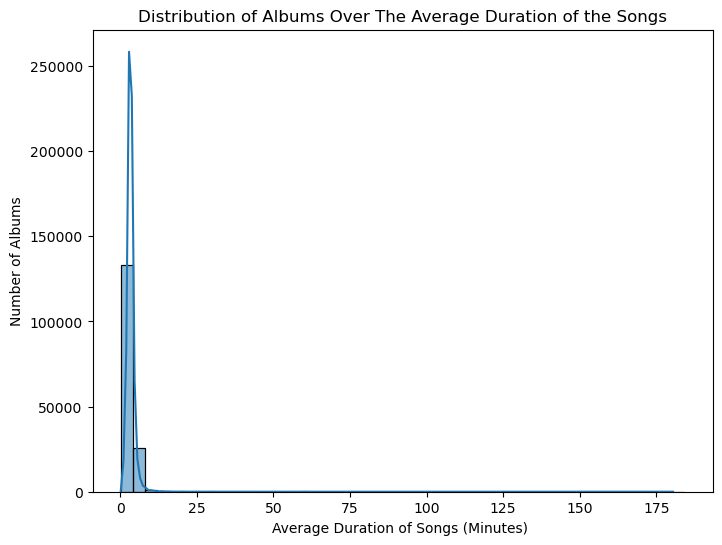

In [20]:
# Plottng the distribution of albums over different numbers of tracks
plt.figure(figsize=(8, 6))
chart = sns.histplot(x= track_duration["average_duration"].sort_values(), kde=True, bins = 10, binwidth = 4)

plt.title('Distribution of Albums Over The Average Duration of the Songs')
plt.xlabel('Average Duration of Songs (Minutes) ')
plt.ylabel('Number of Albums')

plt.show()

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- The majority of the albums in our dataset have the average duration less than 8 minutes
- Also, it is obvious that our dataset is highly skewed, if we use the t_dur of the albums as the plotting feature
- In addition, our dataset also contains a bunch of outliers, which can be removed on regarding the **t_dur**. Clearly, we can see that the number of released albums having average duration of songs more than 8 minutes is significantly less which would distort our analysis
</div>

##### Explore the popularity

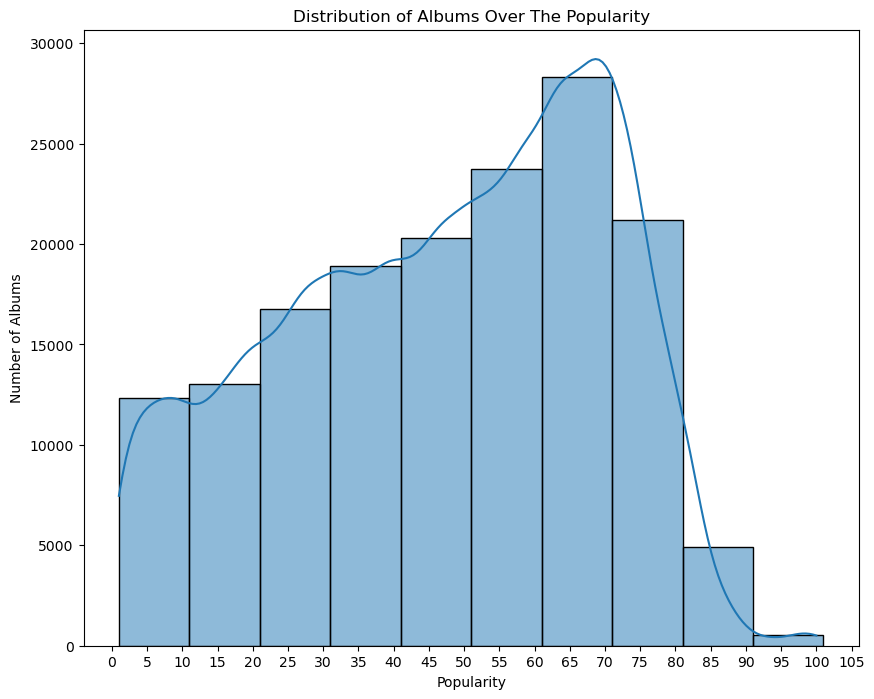

In [21]:
# Plottng the distribution of albums over different numbers of tracks
plt.figure(figsize=(10, 8))
chart = sns.histplot(x= train_df["popularity"].sort_values(), kde=True, bins = 24, binwidth = 10)

plt.title('Distribution of Albums Over The Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Albums')


locator = mdates.DayLocator(interval= 5)
chart.xaxis.set_major_locator(locator)
plt.show()

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- The majority of the albums in our dataset have the **popularity less than 80**
- Also, it is obvious that our dataset is **well-distributed**, if we use the popularity of the albums as the plotting features
</div>

##### Explore other numerical features

In [22]:
train_df.drop(columns = ['id', 'popularity', 'total_tracks', 't_dur0', 't_dur1', 't_dur2'], axis = 1).select_dtypes(exclude = ['object']).columns

Index(['t_dance0', 't_dance1', 't_dance2', 't_energy0', 't_energy1',
       't_energy2', 't_key0', 't_key1', 't_key2', 't_mode0', 't_mode1',
       't_mode2', 't_speech0', 't_speech1', 't_speech2', 't_acous0',
       't_acous1', 't_acous2', 't_ins0', 't_ins1', 't_ins2', 't_live0',
       't_live1', 't_live2', 't_val0', 't_val1', 't_val2', 't_tempo0',
       't_tempo1', 't_tempo2', 't_sig0', 't_sig1', 't_sig2'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_10280\3031115894.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, 1)
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\3031115894.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, 2)
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\3031115894.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, 4)
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\3031115894.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remov

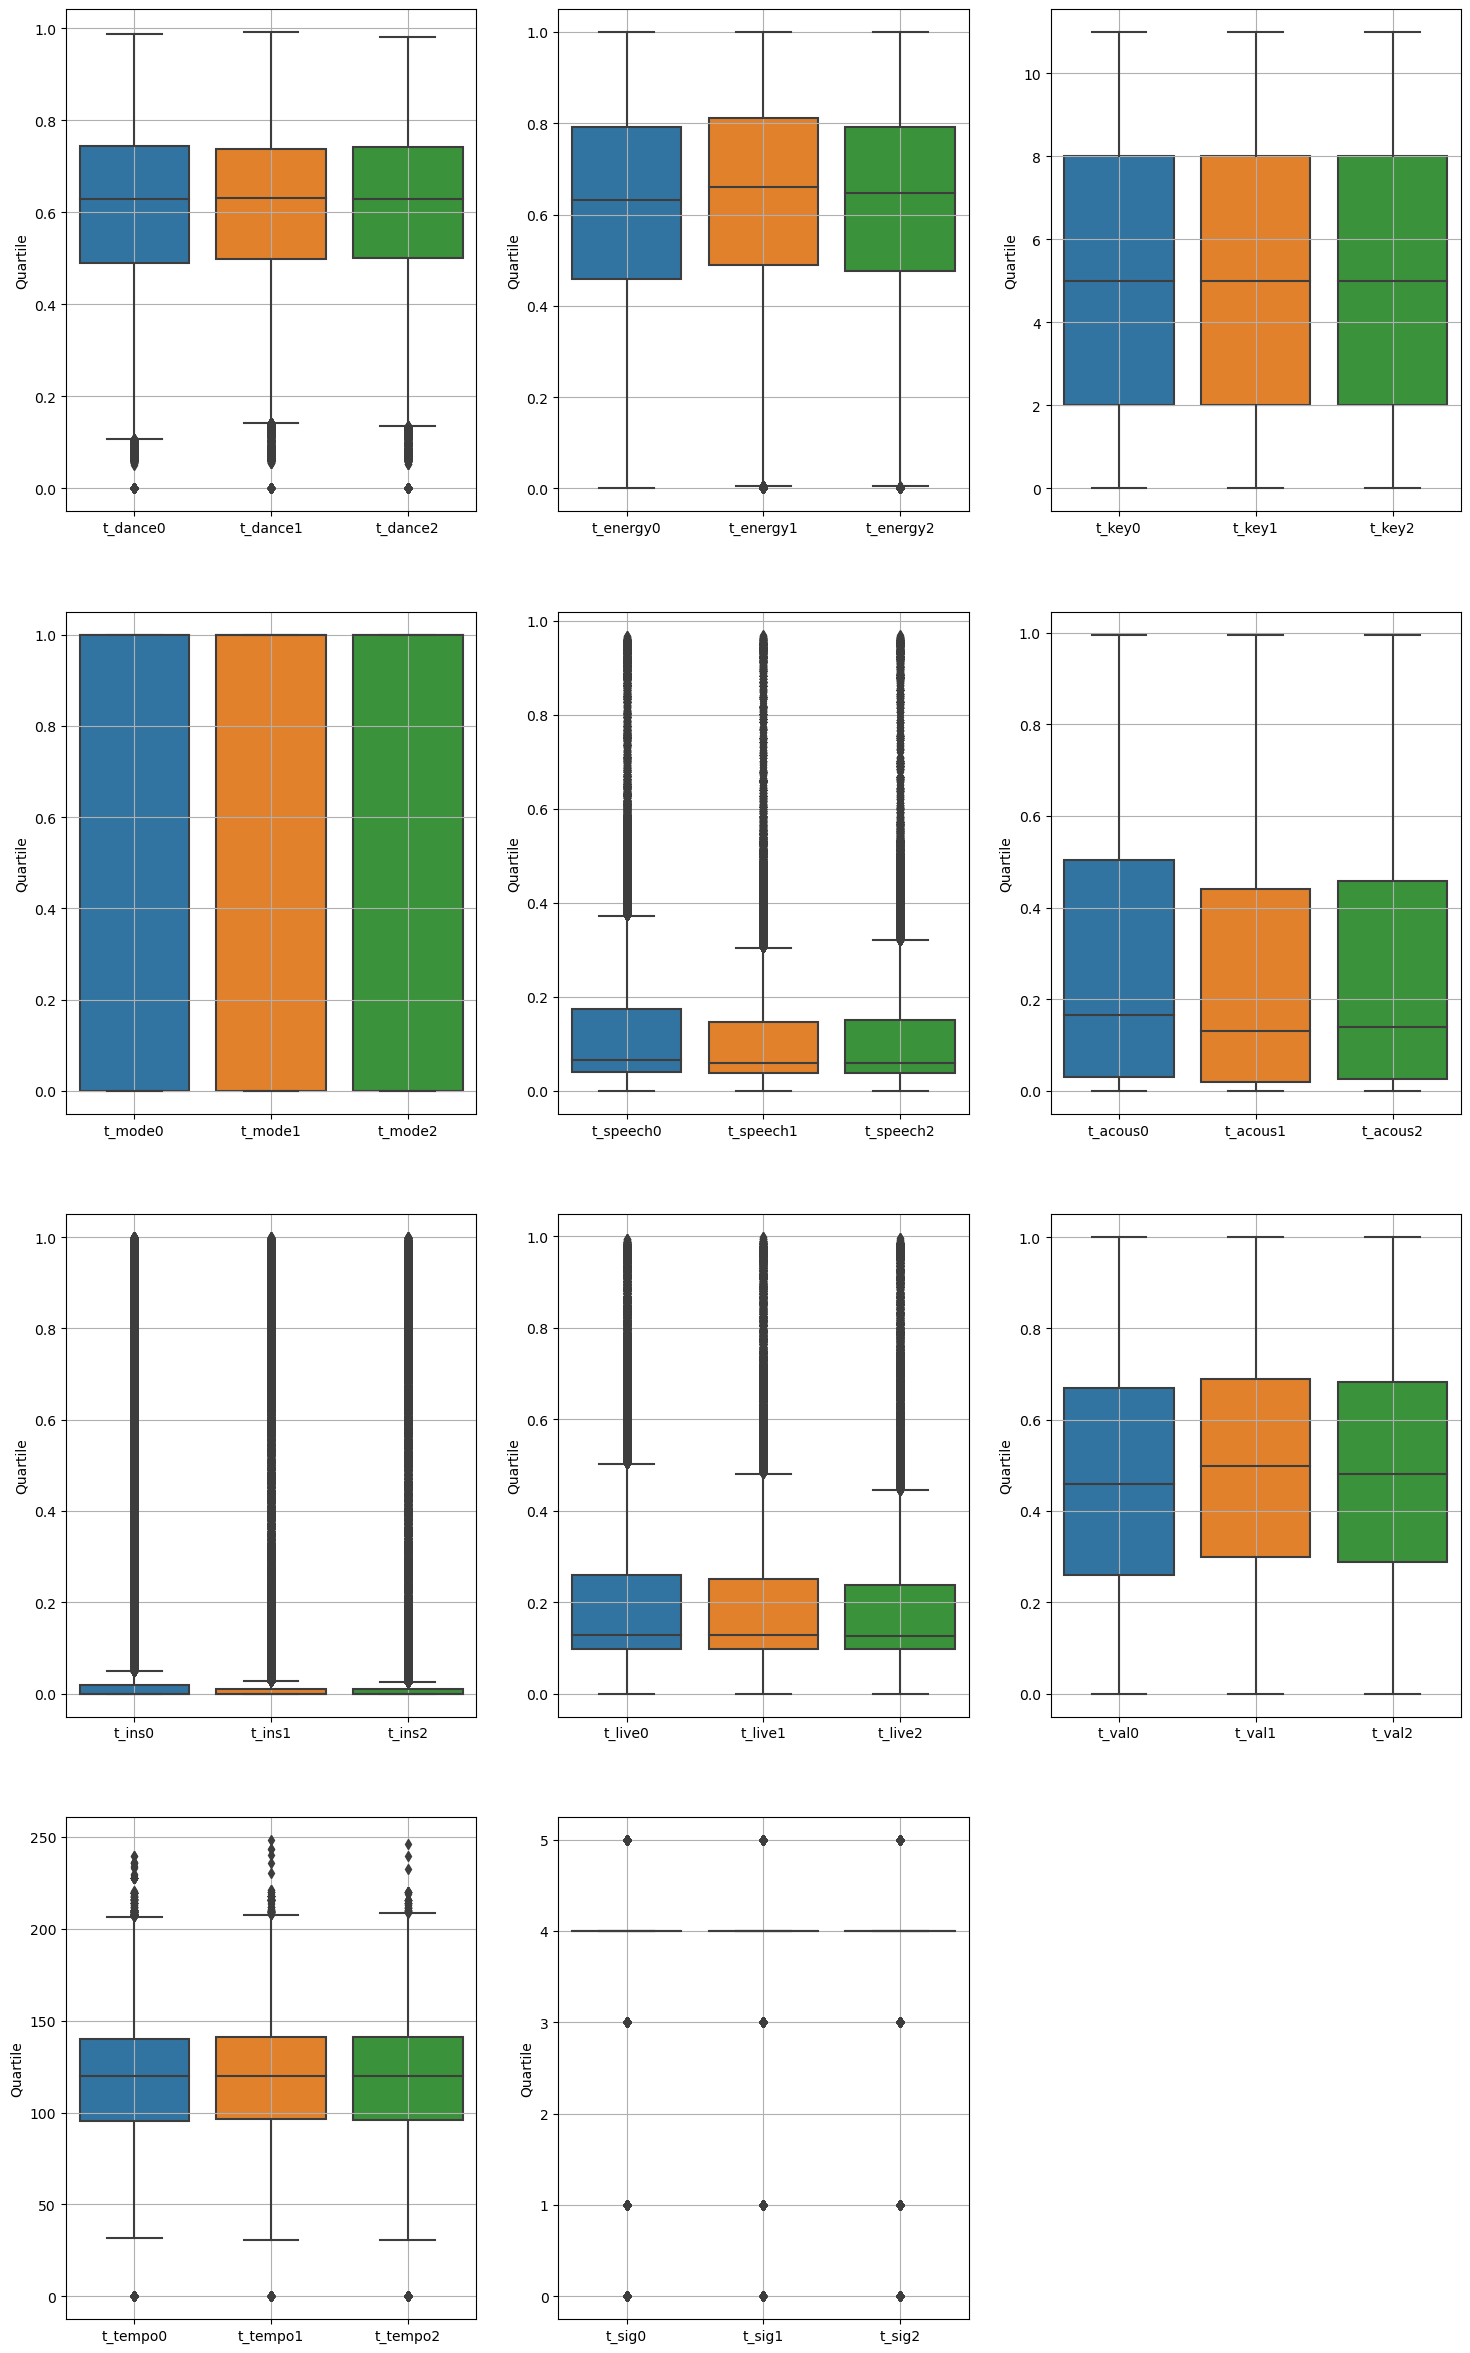

In [23]:
# Plotting
fig, axs = plt.subplots(6, 2, figsize = (18, 30))

plt.subplot(4, 3, 1)
sns.boxplot(data = train_df[['t_dance0', 't_dance1', 't_dance2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 2)
sns.boxplot(data = train_df[['t_energy0', 't_energy1', 't_energy2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 3)
sns.boxplot(data = train_df[['t_key0', 't_key1', 't_key2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 4)
sns.boxplot(data = train_df[['t_mode0', 't_mode1', 't_mode2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 5)
sns.boxplot(data = train_df[['t_speech0', 't_speech1', 't_speech2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 6)
sns.boxplot(data = train_df[['t_acous0', 't_acous1', 't_acous2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 7)
sns.boxplot(data = train_df[['t_ins0', 't_ins1', 't_ins2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 8)
sns.boxplot(data = train_df[['t_live0', 't_live1', 't_live2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 9)
sns.boxplot(data = train_df[['t_val0', 't_val1', 't_val2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 10)
sns.boxplot(data = train_df[['t_tempo0', 't_tempo1', 't_tempo2']])
plt.ylabel('Quartile')
plt.grid()

plt.subplot(4, 3, 11)
sns.boxplot(data = train_df[['t_sig0', 't_sig1', 't_sig2']])
plt.ylabel('Quartile')
plt.grid()

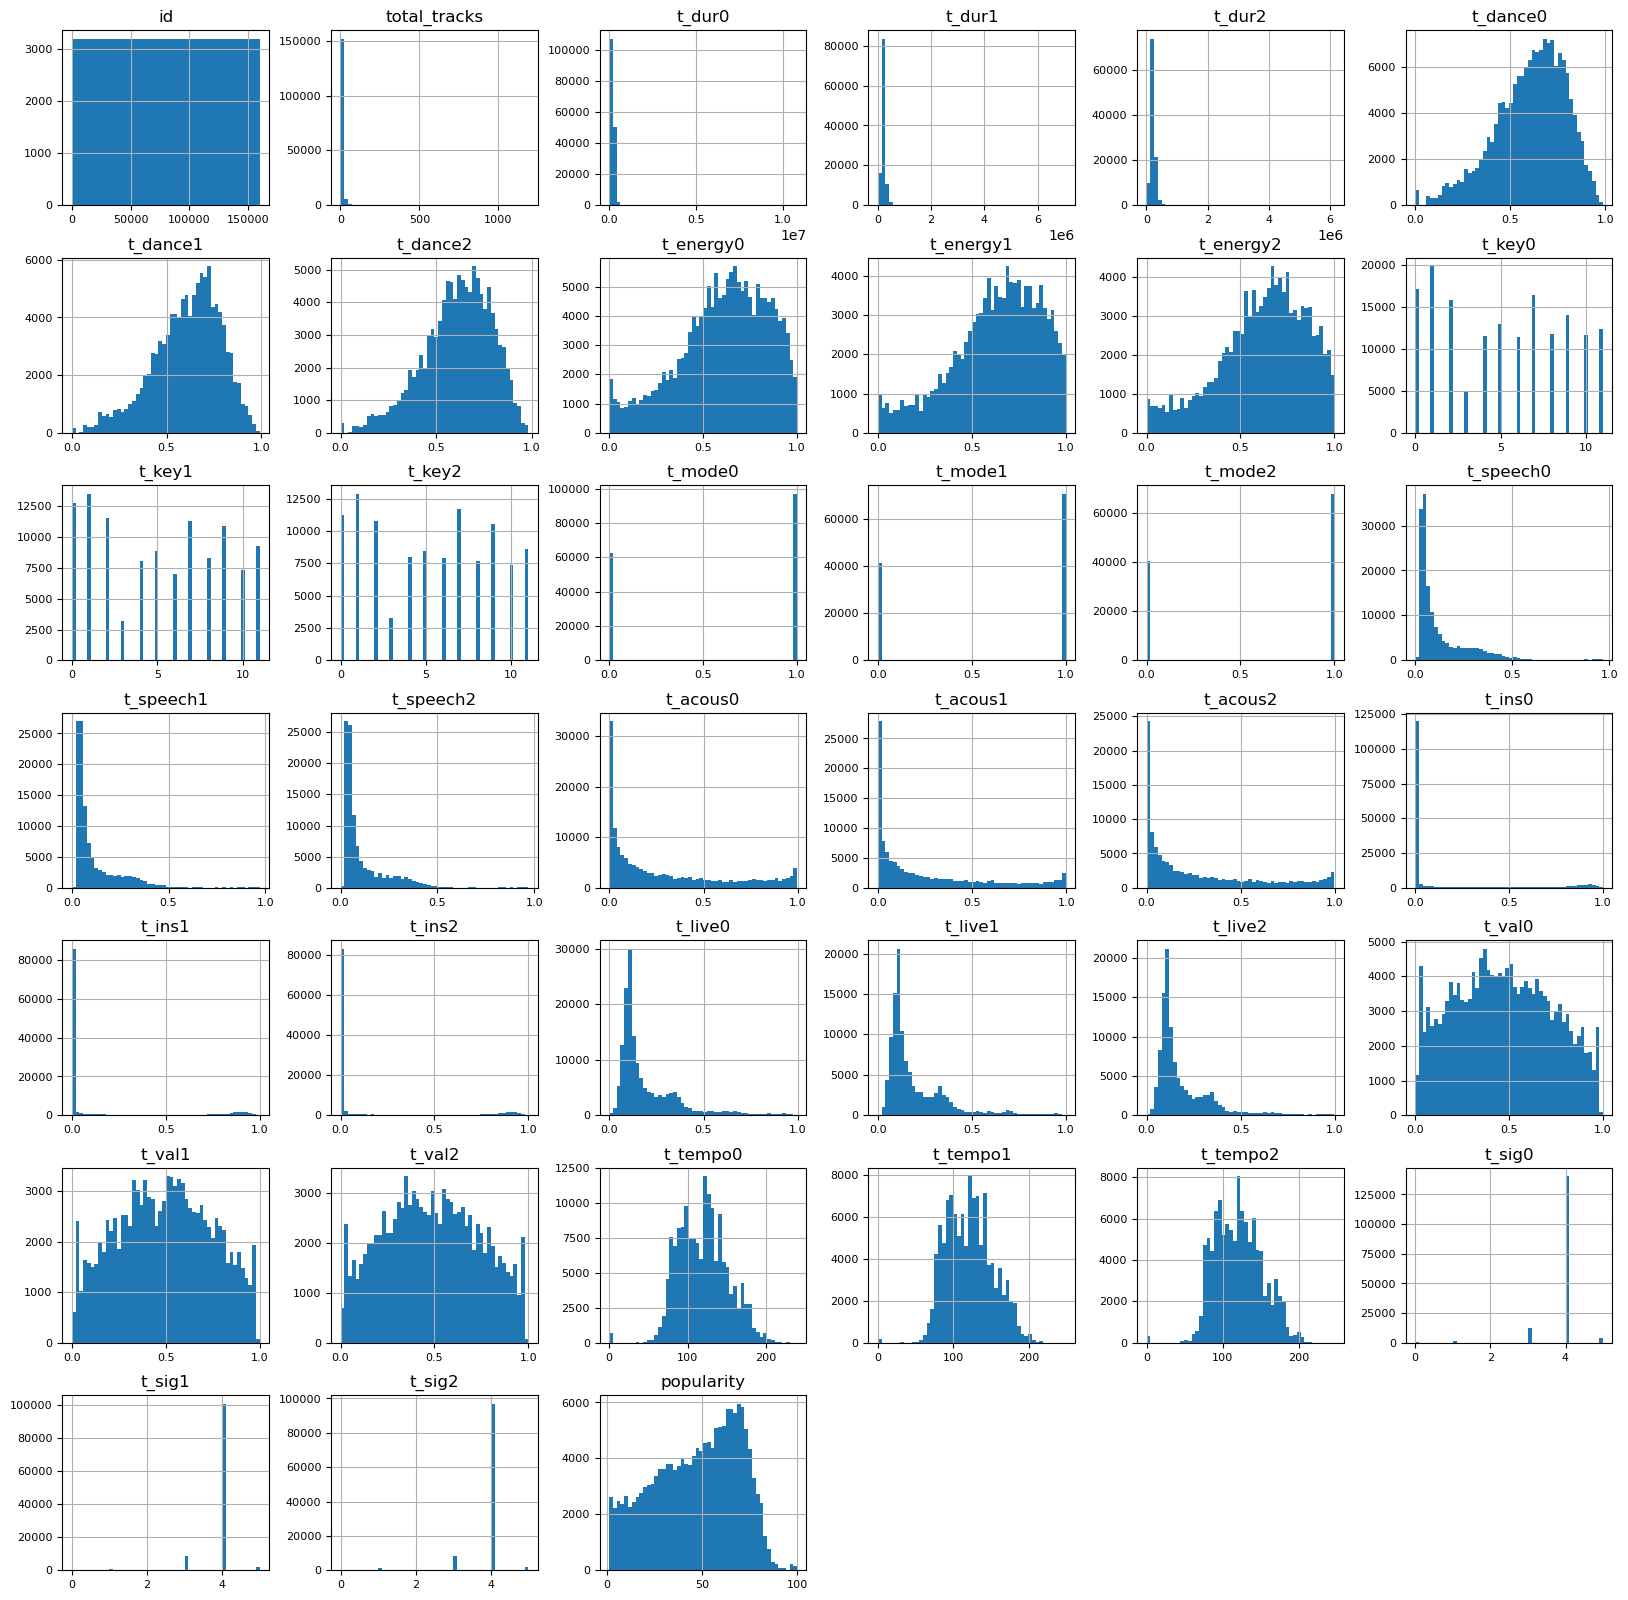

In [25]:
train_df.hist(figsize = (20, 20), bins = 50, xlabelsize = 8, ylabelsize = 8);

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

- **Features have outliers:** Danceability, Speechiness, Instrumentalness, Liveness, Tempo, and Time Signature
- Some of above features have **skewed the dataset** due to outliers: Acousticness, Speechiness, Instrumentalness, Liveness, and Time Signature
</div>

##### Checking correlation between features and the popularity target

In [26]:
# Check the correlation between features and target column
train_df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_10280\1326960601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


id  total_tracks    t_dur0    t_dur1    t_dur2  t_dance0  \
id            1.000000      0.004368 -0.005329 -0.003747 -0.004704 -0.001174   
total_tracks  0.004368      1.000000 -0.064944 -0.031856 -0.059826 -0.125868   
t_dur0       -0.005329     -0.064944  1.000000  0.488621  0.475705 -0.072603   
t_dur1       -0.003747     -0.031856  0.488621  1.000000  0.681992 -0.086975   
t_dur2       -0.004704     -0.059826  0.475705  0.681992  1.000000 -0.082976   
t_dance0     -0.001174     -0.125868 -0.072603 -0.086975 -0.082976  1.000000   
t_dance1      0.000374     -0.071720 -0.122005 -0.121023 -0.117249  0.564652   
t_dance2      0.004133     -0.055879 -0.117974 -0.101905 -0.120964  0.537551   
t_energy0    -0.000129     -0.077847  0.101104  0.033483  0.047922  0.175044   
t_energy1     0.000920     -0.071751 -0.027483  0.036741  0.044891  0.088417   
t_energy2     0.001014     -0.079783 -0.012618  0.023749  0.062973  0.090386   
t_key0        0.003159      0.012781  0.000835 -0.011387 -0.002651  0.013631   
t_key1       -0.004266      0.026770 -0.009851  0.014903  0.006719 -0.006692   
t_key2        0.001461      0.025652  0.006235  0.007189  0.003836  0.023363   
t_mode0      -0.001431      0.005958 -0.003201 -0.000011 -0.014120 -0.060950   
t_mode1      -0.003825     -0.005523  0.011899 -0.000684 -0.000443 -0.051108   
t_mode2      -0.005353     -0.019056  0.012352  0.007556  0.000523 -0.024074   
t_speech0     0.003140      0.114940 -0.149696 -0.063543 -0.070665  0.203284   
t_speech1     0.002907      0.160823 -0.091373 -0.096396 -0.072213  0.180345   
t_speech2     0.000285      0.168653 -0.114145 -0.077096 -0.109394  0.170427   
t_acous0      0.001574      0.084470 -0.063823 -0.001230 -0.029222 -0.268929   
t_acous1     -0.000920      0.080687  0.048650 -0.019142 -0.012354 -0.151361   
t_acous2     -0.001800      0.094870  0.039026  0.017057 -0.039091 -0.170655   
t_ins0       -0.001793      0.054015 -0.011908  0.011754 -0.001603 -0.313341   
t_ins1        0.000773      0.055420  0.060711  0.008712 -0.002084 -0.234661   
t_ins2        0.001178      0.066385  0.045907 -0.001435 -0.017632 -0.245440   
t_live0       0.002894      0.059919 -0.036871  0.002047 -0.000784 -0.131741   
t_live1       0.001141      0.038869  0.000112 -0.001414  0.009535 -0.100151   
t_live2       0.002157      0.043577  0.009293  0.026023  0.004393 -0.096551   
t_val0       -0.000754     -0.031996 -0.033381 -0.012180 -0.013316  0.437450   
t_val1       -0.000862     -0.034701 -0.044089 -0.073622 -0.030130  0.280032   
t_val2        0.002502     -0.028110 -0.039676 -0.024934 -0.065910  0.272961   
t_tempo0     -0.002080     -0.001656  0.043912 -0.004721  0.000020  0.068220   
t_tempo1     -0.001301     -0.038471 -0.004881 -0.012188 -0.022860  0.085554   
t_tempo2     -0.001688     -0.044149 -0.002747 -0.017087 -0.003752  0.074694   
t_sig0        0.000617     -0.054477  0.064644  0.004723 -0.005842  0.236848   
t_sig1       -0.003746     -0.094501  0.008009  0.026964  0.026645  0.117586   
t_sig2        0.001458     -0.033766 -0.007161 -0.009659  0.048494  0.113884   
popularity    0.000619      0.137765 -0.064445 -0.088409 -0.079149 -0.050402   

              t_dance1  t_dance2  t_energy0  t_energy1  ...    t_val0  \
id            0.000374  0.004133  -0.000129   0.000920  ... -0.000754   
total_tracks -0.071720 -0.055879  -0.077847  -0.071751  ... -0.031996   
t_dur0       -0.122005 -0.117974   0.101104  -0.027483  ... -0.033381   
t_dur1       -0.121023 -0.101905   0.033483   0.036741  ... -0.012180   
t_dur2       -0.117249 -0.120964   0.047922   0.044891  ... -0.013316   
t_dance0      0.564652  0.537551   0.175044   0.088417  ...  0.437450   
t_dance1      1.000000  0.610927   0.095992   0.134747  ...  0.251286   
t_dance2      0.610927  1.000000   0.079984   0.104519  ...  0.227232   
t_energy0     0.095992  0.079984   1.000000   0.643481  ...  0.345858   
t_energy1     0.134747  0.104519   0.643481   1.000000  ...  0.187238   
t_energy2     0.

Text(0.5, 1.0, 'Popularity Based on Time Signature')

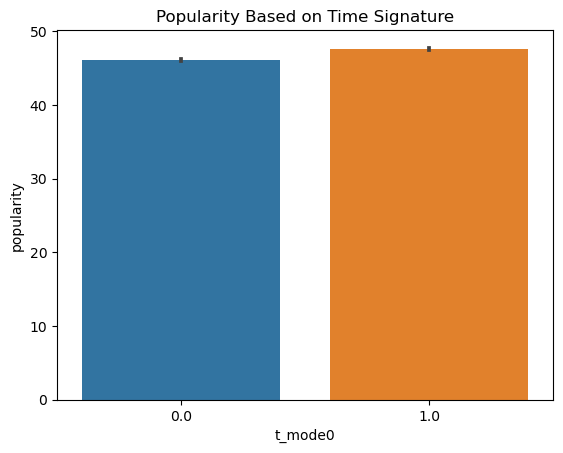

In [27]:
# Check the relationship between mode and popularity
sns.barplot(x = 't_mode0', y = 'popularity', data = train_df)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

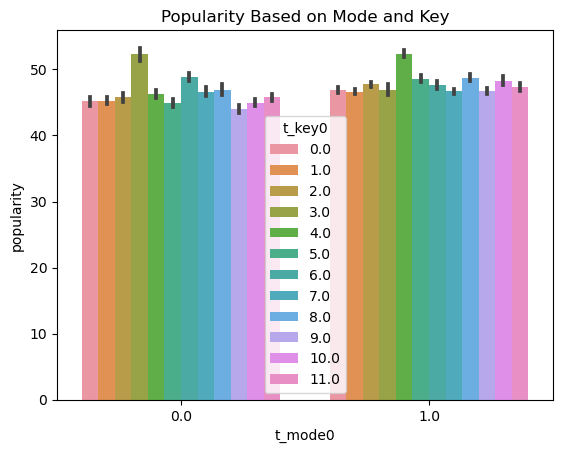

In [28]:
sns.barplot(x = 't_mode0', y = 'popularity', hue = 't_key0', data = train_df)
plt.title('Popularity Based on Mode and Key')

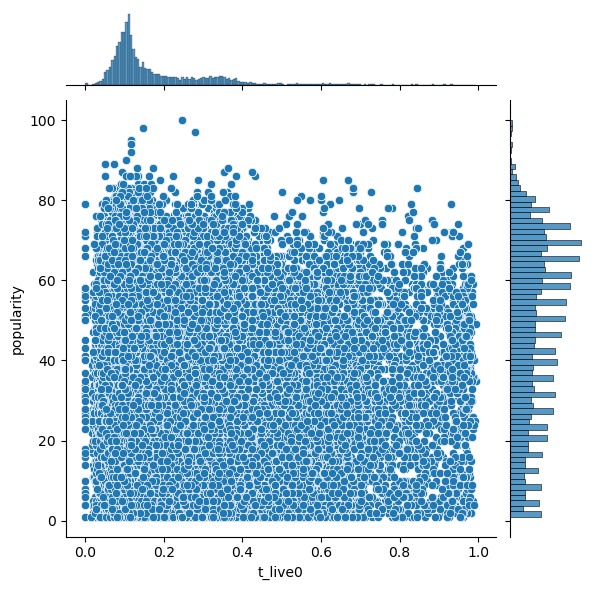

In [29]:
# Check the relationship between Liveness and popularity
sns.jointplot(x = 't_live0', y = 'popularity', data = train_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2944914786.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_above_70['t_tempo0'])


Text(0.5, 1.0, 'Acoustiness for Albums with More than 70 Popularity')

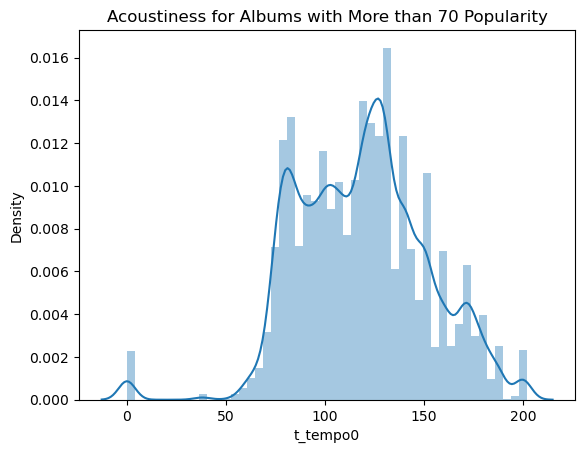

In [30]:
# Check the Acousticness when the popularity above 70 (The third quartile)
popular_above_70 = train_df[train_df.popularity > 70]
sns.distplot(popular_above_70['t_tempo0'])
plt.title('Acoustiness for Albums with More than 70 Popularity')

C:\Users\HP\AppData\Local\Temp\ipykernel_10280\924573973.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_below_70['t_tempo0'])


Text(0.5, 1.0, 'Acoustiness for Albums with Less than 70 Popularity')

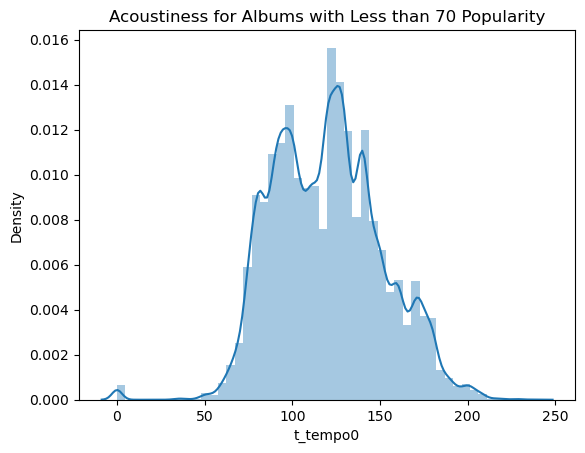

In [31]:
# Check the Acousticness when the popularity equal or less than 70 (The third quartile)
popular_below_70 = train_df[train_df.popularity <= 70]
sns.distplot(popular_below_70['t_tempo0'])
plt.title('Acoustiness for Albums with Less than 70 Popularity')

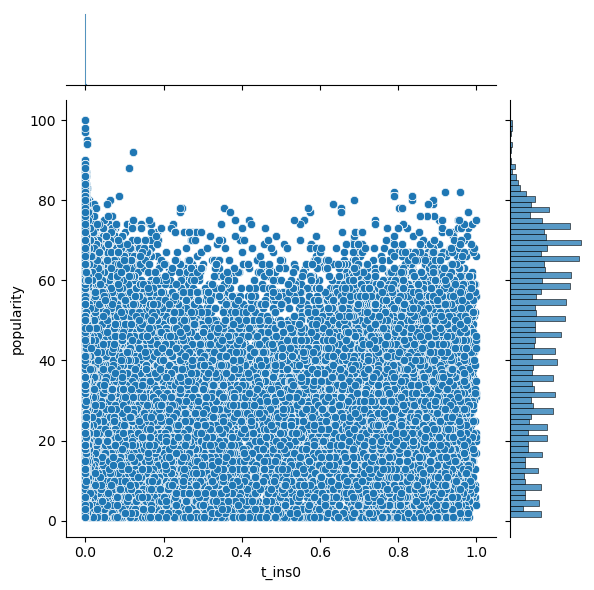

In [32]:
# Check the relationship between Instrumentalness of the first track and Popularity
sns.jointplot(data = train_df, x = 't_ins0', y ='popularity')

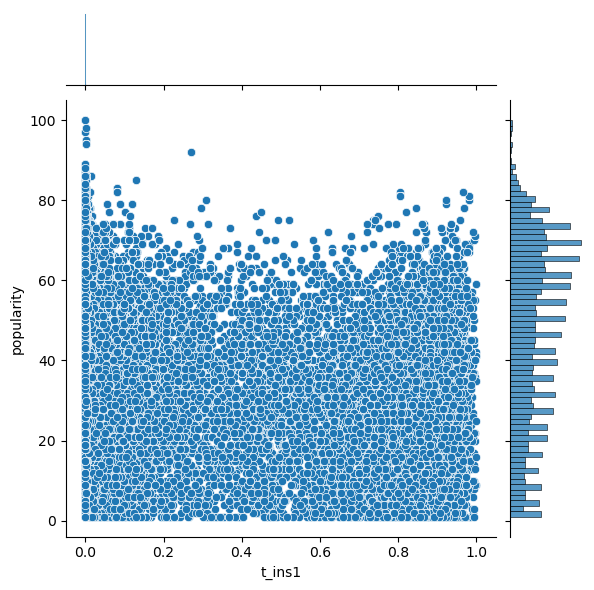

In [33]:
# Check the relationship between Instrumentalness of the second track and Popularity
sns.jointplot(data = train_df, x = 't_ins1', y ='popularity')

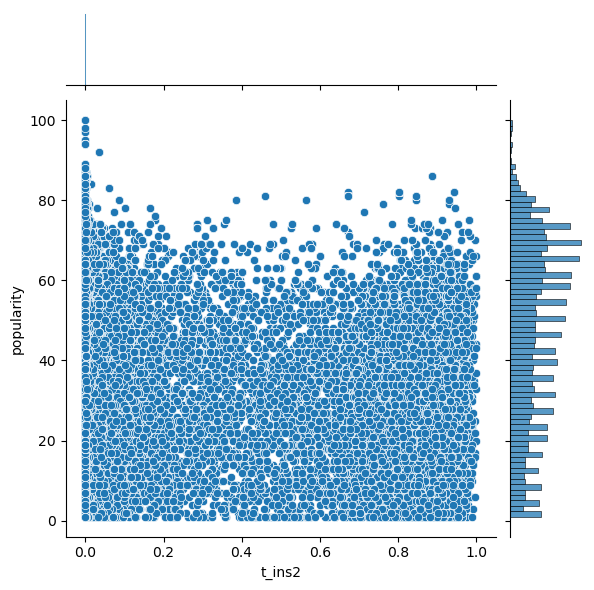

In [34]:
# Check the relationship between Instrumentalness of the third track and Popularity
sns.jointplot(data = train_df, x = 't_ins2', y ='popularity')

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

It's pretty hard to see the relationships between predictors and target column. We also can see the weak correlations between features and popularity columns through correlation matrix. This could be a tough point later for our analysis, and this might **need a large enough data for the models to learn and predict correctly the popularity**.
</div>

### Checking duplicates

In [35]:
print('The number of duplicates in train dataset after droping id columns: ', train_df.drop('id', axis = 1).duplicated().sum())
print('The number of duplicates in test dataset after droping id columns: ', test_df.drop('id', axis = 1).duplicated().sum())

The number of duplicates in train dataset after droping id columns:  87643
The number of duplicates in test dataset after droping id columns:  7222


In [36]:
train = train_df.drop('id', axis = 1)
train[train.duplicated()]

name release_date  \
51                                               I AM YOU   2018-08-03   
105           Eyes Blue Like The Atlantic (feat. Subvrbs)   2020-07-20   
172                                                  SOUR   2021-05-21   
240                                                ZONKEY   2016-11-11   
260     Yesterday, Today, Tomorrow - The Greatest Hits...   1997-03-25   
...                                                   ...          ...   
159994                                 Y Que No y Que Tal   2020-05-19   
159995  Guqin Music "The Pure Sound of Mountain and Wa...   2009-01-01   
159996  Jalebi Baby (Tesher x Jason Derulo) [DallasK R...   2021-08-20   
159997                             Country Again (Side A)   2021-04-30   
159998                                                Hmm   2021-06-25   

                                artists  total_tracks  \
51                          YNW Melly,             15   
105                        Sista Prod,              1   
172                    Olivia Rodrigo,             11   
240                   Umphrey's McGee,             12   
260                     Kenny Loggins,             15   
...                                 ...           ...   
159994       Lees y Feer, Lucas Cliff,              1   
159995                    Shuishan Yu,             16   
159996  Tesher, Jason Derulo, DallasK,              1   
159997                   Thomas Rhett,             11   
159998                         Gjesti,              1   

                                                  t_name0  \
51                                               I AM YOU   
105           Eyes Blue Like The Atlantic (feat. Subvrbs)   
172                                                brutal   
240                                 National Loser Anthem   
260                                            This Is It   
...                                                   ...   
159994                                 Y Que No y Que Tal   
159995                        Moon Over the Mountain Pass   
159996  Jalebi Baby (Tesher x Jason Derulo) [DallasK R...   
159997                                      Want It Again   
159998                                                Hmm   

                                                  t_name1  \
51                             Virtual (Blue Balenciagas)   
105                                                   NaN   
172                                               traitor   
240                                    Life During Exodus   
260     Whenever I Call You "Friend" (feat. Stevie Nicks)   
...                                                   ...   
159994                                                NaN   
159995                            The Song of Autumn Wind   
159996                                                NaN   
159997                                         Growing Up   
159998                                                NaN   

                         t_name2  t_dur0    t_dur1    t_dur2  ...  t_val1  \
51                    RISK TAKER  193733  193618.0  352859.0  ...  0.5770   
105                          NaN  154599       NaN       NaN  ...     NaN   
172              drivers license  143746  229226.0  242013.0  ...  0.0849   
240     Can't Rock My Dream Face  411713  521714.0  270628.0  ...  0.8600   
260                    Footloose  236293  241133.0  220706.0  ...  0.6730   
...                          ...     ...       ...       ...  ...     ...   
159994                       NaN  245627       NaN       NaN  ...     NaN   
159995           Drunken Madness  120160  158173.0  159586.0  ...  0.1710   
159996                       NaN  161061       NaN       NaN  ...     NaN   
159997  What’s Your Country Song  172586  181266.0  171333.0  ...  0.5610   
159998                       NaN  134265       NaN       NaN  ...     NaN   

        t_val2  t_tempo0  t_tempo1  t_tempo2  t_sig0  t_sig1  t_sig2  \
51      0.6730  

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

We do have duplicates in our dataset after dropping **id** column. Id column is the primany key which is unique for every row. This column does not bring any insight to the popularity prediction. It does make sense when checking the duplicates, we have to drop this id column.
</div>

### Checking missing values

In [37]:
missing_train_df = train_df.isnull().sum().reset_index().rename(columns = {'index': 'Feature', 0: 'Missing Counts'})
missing_train_df['Percentage'] = round(missing_train_df['Missing Counts'] / len(train_df) * 100, 2)

In [38]:
missing_test_df = test_df.isnull().sum().reset_index().rename(columns = {'index': 'Feature', 0: 'Missing Counts'})
missing_test_df['Percentage'] = round(missing_test_df['Missing Counts'] / len(test_df) * 100, 2)

In [39]:
missing_train_df

Feature  Missing Counts  Percentage
0             id               0        0.00
1           name               0        0.00
2   release_date               0        0.00
3        artists               0        0.00
4   total_tracks               0        0.00
5        t_name0               0        0.00
6        t_name1           47716       29.82
7        t_name2           51533       32.21
8         t_dur0               0        0.00
9         t_dur1           47716       29.82
10        t_dur2           51533       32.21
11      t_dance0             214        0.13
12      t_dance1           47841       29.90
13      t_dance2           51610       32.26
14     t_energy0             214        0.13
15     t_energy1           47841       29.90
16     t_energy2           51610       32.26
17        t_key0             214        0.13
18        t_key1           47841       29.90
19        t_key2           51610       32.26
20       t_mode0             214        0.13
21       t_mode1           47841       29.90
22       t_mode2           51610       32.26
23     t_speech0             214        0.13
24     t_speech1           47841       29.90
25     t_speech2           51610       32.26
26      t_acous0             214        0.13
27      t_acous1           47841       29.90
28      t_acous2           51610       32.26
29        t_ins0             214        0.13
30        t_ins1           47841       29.90
31        t_ins2           51610       32.26
32       t_live0             214        0.13
33       t_live1           47841       29.90
34       t_live2           51610       32.26
35        t_val0             214        0.13
36        t_val1           47841       29.90
37        t_val2           51610       32.26
38      t_tempo0             214        0.13
39      t_tempo1           47841       29.90
40      t_tempo2           51610       32.26
41        t_sig0             214        0.13
42        t_sig1           47841       29.90
43        t_sig2           51610       32.26
44    popularity               0        0.00
45          year               0        0.00

In [40]:
missing_test_df

Feature  Missing Counts  Percentage
0             id               0        0.00
1           name               1        0.00
2   release_date               0        0.00
3        artists               0        0.00
4   total_tracks               0        0.00
5        t_name0               1        0.00
6        t_name1            6288       29.65
7        t_name2            6790       32.02
8         t_dur0               0        0.00
9         t_dur1            6288       29.65
10        t_dur2            6790       32.02
11      t_dance0              36        0.17
12      t_dance1            6302       29.72
13      t_dance2            6796       32.05
14     t_energy0              36        0.17
15     t_energy1            6302       29.72
16     t_energy2            6796       32.05
17        t_key0              36        0.17
18        t_key1            6302       29.72
19        t_key2            6796       32.05
20       t_mode0              36        0.17
21       t_mode1            6302       29.72
22       t_mode2            6796       32.05
23     t_speech0              36        0.17
24     t_speech1            6302       29.72
25     t_speech2            6796       32.05
26      t_acous0              36        0.17
27      t_acous1            6302       29.72
28      t_acous2            6796       32.05
29        t_ins0              36        0.17
30        t_ins1            6302       29.72
31        t_ins2            6796       32.05
32       t_live0              36        0.17
33       t_live1            6302       29.72
34       t_live2            6796       32.05
35        t_val0              36        0.17
36        t_val1            6302       29.72
37        t_val2            6796       32.05
38      t_tempo0              36        0.17
39      t_tempo1            6302       29.72
40      t_tempo2            6796       32.05
41        t_sig0              36        0.17
42        t_sig1            6302       29.72
43        t_sig2            6796       32.05

<div class="alert alert-block alert-warning">
<b>Observations: </b> 

We do have **missing values** in our train and test datasets, but the percentages of missing values are pretty similar between music album's characteristics due to the missing values in music tracks' names.
</div>

## 3. Data Preprocessing

### Feature Engineering and Missing Values

#### Release Date feature

In [41]:
train_df.drop(columns = 'year', axis = 1, inplace = True)

In [42]:
# Extract Year from Release Date
train_df['release_year'] = [int(str(v).split('-')[0]) for v in train_df['release_date']]
train_df.head(3)

id                name release_date  \
0   0  Ya Solo Eres Mi Ex   2021-09-09   
1   1              Nibiru   2019-11-29   
2   2               DAMN.   2017-04-14   

                                    artists  total_tracks             t_name0  \
0  La Adictiva Banda San José de Mesillas,              7  Ya Solo Eres Mi Ex   
1                                   Ozuna,             18              Nibiru   
2                          Kendrick Lamar,             14              BLOOD.   

                  t_name1                 t_name2  t_dur0    t_dur1  ...  \
0            La Malagueña  México Lindo y Querido  222133  189133.0  ...   
1  Hasta Que Salga el Sol                Temporal  158826  188480.0  ...   
2                    DNA.                    YAH.  118066  185946.0  ...   

   t_val1  t_val2  t_tempo0  t_tempo1  t_tempo2  t_sig0  t_sig1  t_sig2  \
0   0.878   0.833    74.924   126.970   197.836     4.0     3.0     3.0   
1   0.598   0.484   173.023    96.042   148.019     4.0     4.0     4.0   
2   0.422   0.648   156.907   139.913    69.986     4.0     4.0     4.0   

   popularity  release_year  
0          51          2021  
1          67          2019  
2          81          2017  

[3 rows x 46 columns]

In [43]:
# Extract Month from Release Date
train_df['release_month'] = [int(str(v).split('-')[1]) if len(str(v).split('-')) > 1 else 0 for v in train_df['release_date']]
train_df.head()

id                           name release_date  \
0   0             Ya Solo Eres Mi Ex   2021-09-09   
1   1                         Nibiru   2019-11-29   
2   2                          DAMN.   2017-04-14   
3   3  Did I Shave My Legs For This?   1996-01-01   
4   4                        glisten   2018-05-04   

                                    artists  total_tracks  \
0  La Adictiva Banda San José de Mesillas,              7   
1                                   Ozuna,             18   
2                          Kendrick Lamar,             14   
3                            Deana Carter,             11   
4                           Jeremy Zucker,              4   

                      t_name0                 t_name1                 t_name2  \
0          Ya Solo Eres Mi Ex            La Malagueña  México Lindo y Querido   
1                      Nibiru  Hasta Que Salga el Sol                Temporal   
2                      BLOOD.                    DNA.                    YAH.   
3   I've Loved Enough To Know        We Danced Anyway             Count Me In   
4  all the kids are depressed                wildfire     glisten (interlude)   

   t_dur0    t_dur1  ...  t_val2  t_tempo0  t_tempo1  t_tempo2  t_sig0  \
0  222133  189133.0  ...   0.833    74.924   126.970   197.836     4.0   
1  158826  188480.0  ...   0.484   173.023    96.042   148.019     4.0   
2  118066  185946.0  ...   0.648   156.907   139.913    69.986     4.0   
3  203693  202533.0  ...   0.263   120.285    94.054   130.011     4.0   
4  169973  163000.0  ...   0.466   103.861   129.170   116.349     4.0   

   t_sig1  t_sig2  popularity  release_year  release_month  
0     3.0     3.0          51          2021              9  
1     4.0     4.0          67          2019             11  
2     4.0     4.0          81          2017              4  
3     4.0     4.0          53          1996              1  
4     4.0     4.0          70          2018              5  

[5 rows x 47 columns]

#### Missing values

<div class="alert alert-block alert-warning">
<b>Notes from EDA: </b> 

We do have **missing values** in our train and test datasets, but the percentages of missing values are pretty similar between music album's characteristics due to the missing values in music tracks' names. Now, we are going to explore this.
</div>

##### Case 1: When 3 tracks' name are not null

In [44]:
case1_df = train_df[(train_df['t_name0'].notnull()) & (train_df['t_name1'].notnull()) & (train_df['t_name2'].notnull())]

In [45]:
case1_df.isnull().sum()

id                 0
name               0
release_date       0
artists            0
total_tracks       0
t_name0            0
t_name1            0
t_name2            0
t_dur0             0
t_dur1             0
t_dur2             0
t_dance0         181
t_dance1          77
t_dance2          77
t_energy0        181
t_energy1         77
t_energy2         77
t_key0           181
t_key1            77
t_key2            77
t_mode0          181
t_mode1           77
t_mode2           77
t_speech0        181
t_speech1         77
t_speech2         77
t_acous0         181
t_acous1          77
t_acous2          77
t_ins0           181
t_ins1            77
t_ins2            77
t_live0          181
t_live1           77
t_live2           77
t_val0           181
t_val1            77
t_val2            77
t_tempo0         181
t_tempo1          77
t_tempo2          77
t_sig0           181
t_sig1            77
t_sig2            77
popularity         0
release_year       0
release_month      0
dtype: int64

- **When three tracks'names are not null, these rows have missing values. We are going to impute mean for these missing values**

##### Case 2: Two t_name1 and t_name2 are null.

In [46]:
case2_df = train_df[(train_df['t_name1'].isnull()) & (train_df['t_name2'].isnull())]

In [47]:
case2_df.isnull().sum()

id                   0
name                 0
release_date         0
artists              0
total_tracks         0
t_name0              0
t_name1          47716
t_name2          47716
t_dur0               0
t_dur1           47716
t_dur2           47716
t_dance0            12
t_dance1         47716
t_dance2         47716
t_energy0           12
t_energy1        47716
t_energy2        47716
t_key0              12
t_key1           47716
t_key2           47716
t_mode0             12
t_mode1          47716
t_mode2          47716
t_speech0           12
t_speech1        47716
t_speech2        47716
t_acous0            12
t_acous1         47716
t_acous2         47716
t_ins0              12
t_ins1           47716
t_ins2           47716
t_live0             12
t_live1          47716
t_live2          47716
t_val0              12
t_val1           47716
t_val2           47716
t_tempo0            12
t_tempo1         47716
t_tempo2         47716
t_sig0              12
t_sig1           47716
t_sig2     

- **It is obvious that when track names 01 and 02 are null, all characteristics regarding 01 and 02 are null. Therefore these missing values should not be imputed by any values**
- For those characteristics missing values regarding the t_name0, we will consider the percentage of missing values and decide whether we should drop or impute them.

##### Case 3: Only t_name1 or t_name2 is null.

In [48]:
case3_df = train_df[(train_df['t_name1'].isnull()) | (train_df['t_name2'].isnull())]

In [49]:
case3_df.isnull().sum()

id                   0
name                 0
release_date         0
artists              0
total_tracks         0
t_name0              0
t_name1          47716
t_name2          51533
t_dur0               0
t_dur1           47716
t_dur2           51533
t_dance0            33
t_dance1         47764
t_dance2         51533
t_energy0           33
t_energy1        47764
t_energy2        51533
t_key0              33
t_key1           47764
t_key2           51533
t_mode0             33
t_mode1          47764
t_mode2          51533
t_speech0           33
t_speech1        47764
t_speech2        51533
t_acous0            33
t_acous1         47764
t_acous2         51533
t_ins0              33
t_ins1           47764
t_ins2           51533
t_live0             33
t_live1          47764
t_live2          51533
t_val0              33
t_val1           47764
t_val2           51533
t_tempo0            33
t_tempo1         47764
t_tempo2         51533
t_sig0              33
t_sig1           47764
t_sig2     

<div class="alert alert-block alert-info">
<b>Information: </b> 
    
Since all characteristic features of the albums have missing values due to the number of tracks in its albums, we decide to do feature engineering by taking average of every three features with the same type and represent by the average values. By doing this, we can actually eliminate all missing values.  
</div>

In [227]:
# Create a new_train_df from here
new_train_df = train_df.copy()

In [228]:
# Calculate average by row each three features of a characteristic
new_train_df['t_duration_avg'] = new_train_df[['t_dur0', 't_dur1', 't_dur2']].mean(axis = 1, skipna = True)
new_train_df['t_danceability_avg'] = new_train_df[['t_dance0','t_dance1', 't_dance2']].mean(axis = 1, skipna = True)
new_train_df['t_energy_avg'] = new_train_df[['t_energy0', 't_energy1', 't_energy2']].mean(axis = 1, skipna = True)
new_train_df['t_key_avg'] = new_train_df[['t_key0', 't_key1', 't_key2']].mean(axis = 1, skipna = True)
new_train_df['t_mode_avg'] = new_train_df[['t_mode0', 't_mode1', 't_mode2']].mean(axis = 1, skipna = True)
new_train_df['t_speech_avg'] = new_train_df[['t_speech0', 't_speech1', 't_speech2']].mean(axis = 1, skipna = True)
new_train_df['t_acoustic_avg'] = new_train_df[['t_acous0', 't_acous1', 't_acous2']].mean(axis = 1, skipna = True)
new_train_df['t_instrumental_avg'] = new_train_df[['t_ins0', 't_ins1', 't_ins2']].mean(axis = 1, skipna = True)
new_train_df['t_liveness_avg'] = new_train_df[['t_live0', 't_live1', 't_live2']].mean(axis = 1, skipna = True)
new_train_df['t_valence_avg'] = new_train_df[['t_val0', 't_val1', 't_val2']].mean(axis = 1, skipna = True)
new_train_df['t_tempo_avg'] = new_train_df[['t_tempo0', 't_tempo1', 't_tempo2']].mean(axis = 1, skipna = True)
new_train_df['t_sig_avg'] = new_train_df[['t_sig0', 't_sig1', 't_sig2']].mean(axis = 1, skipna = True)

- Now we have a new train_df with all new average columns for characteristics of the albums and we should drop all the previous columns regarding the album's characteristics

### Drop unnecessary columns

<div class="alert alert-block alert-info">
<b>Information: </b> 
    
We are going to drop several columns which do not contribute any insights to the popularity prediction, namely **name, artists, release_date, t_name0, t_name1, t_name2**
</div>

In [229]:
# List of unwanted columns
drop_cols = ['name', 'artists', 'release_date','t_name0', 't_name1', 't_name2',
             't_dur1', 't_dance1', 't_energy1', 't_key1', 't_mode1',  't_speech1',
             't_acous1', 't_ins1', 't_live1', 't_val1' , 't_tempo1', 't_sig1',
             't_dur2', 't_dance2', 't_energy2', 't_key2', 't_mode2',  't_speech2',
             't_acous2', 't_ins2',  't_live2', 't_val2', 't_tempo2', 't_sig2',
             't_dur0', 't_dance0', 't_energy0', 't_key0', 't_mode0',  't_speech0',
             't_acous0', 't_ins0',  't_live0', 't_val0', 't_tempo0', 't_sig0']

# Create a new train_df and also drop those columns in our training dataset
new_train_df = new_train_df.drop(columns = drop_cols, axis = 1)
new_train_df.head()

id  total_tracks  popularity  release_year  release_month  t_duration_avg  \
0   0             7          51          2021              9   192284.000000   
1   1            18          67          2019             11   195199.666667   
2   2            14          81          2017              4   154768.333333   
3   3            11          53          1996              1   203866.333333   
4   4             4          70          2018              5   140693.000000   

   t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  t_speech_avg  \
0            0.536667      0.458667   3.666667    0.666667      0.048967   
1            0.779000      0.658333   4.333333    0.000000      0.202100   
2            0.555000      0.487000   3.333333    0.666667      0.272667   
3            0.628333      0.585000   6.333333    1.000000      0.027467   
4            0.638000      0.302333   3.666667    1.000000      0.071500   

   t_acoustic_avg  t_instrumental_avg  t_liveness_avg  t_valence_avg  \
0        0.490333        9.200000e-06        0.091233       0.779000   
1        0.109367        3.207000e-04        0.114333       0.413333   
2        0.240847        2.863511e-02        0.286733       0.521333   
3        0.333333        8.166667e-07        0.203333       0.556333   
4        0.711333        1.058667e-05        0.270667       0.533000   

   t_tempo_avg  t_sig_avg  
0   133.243333   3.333333  
1   139.028000   4.000000  
2   122.268667   4.000000  
3   114.783333   4.000000  
4   116.460000   4.000000

In [230]:
# Check the train_df info again
new_train_df.isnull().sum()

id                     0
total_tracks           0
popularity             0
release_year           0
release_month          0
t_duration_avg         0
t_danceability_avg    57
t_energy_avg          57
t_key_avg             57
t_mode_avg            57
t_speech_avg          57
t_acoustic_avg        57
t_instrumental_avg    57
t_liveness_avg        57
t_valence_avg         57
t_tempo_avg           57
t_sig_avg             57
dtype: int64

In [231]:
# Drop nan values for these missing values as the imputation by mean, mode, or median can distort the analysis.
drop_na_cols = ['t_duration_avg', 't_danceability_avg', 't_energy_avg', 't_key_avg',
                't_mode_avg', 't_speech_avg', 't_acoustic_avg', 't_instrumental_avg',
                't_liveness_avg', 't_valence_avg', 't_tempo_avg', 't_sig_avg']

new_train_df.dropna(subset = drop_na_cols, inplace = True)

In [232]:
# Check the train_df info again
new_train_df.isnull().sum()

id                    0
total_tracks          0
popularity            0
release_year          0
release_month         0
t_duration_avg        0
t_danceability_avg    0
t_energy_avg          0
t_key_avg             0
t_mode_avg            0
t_speech_avg          0
t_acoustic_avg        0
t_instrumental_avg    0
t_liveness_avg        0
t_valence_avg         0
t_tempo_avg           0
t_sig_avg             0
dtype: int64

### Check duplicated rows

In [233]:
# Check the duplicates in our train_df with and without 'id' column
print('The number of duplicated rows with ID column: ', new_train_df.duplicated().sum())
print('\nThe number of duplicated rows with ID column: ', new_train_df.drop('id', axis = 1).duplicated().sum())

The number of duplicated rows with ID column:  0

The number of duplicated rows with ID column:  87624


<div class="alert alert-block alert-warning">
<b>Notes: </b> 

Now, we see another issue regarding the duplicated rows with and without ID column. We actually have the exactly same rows for a particular album with different ID number.
    
As mentioned earlier that our analysis might be tough due to the weak correlations between predictors and target column, we should have a big enough data feeding into the models to learn. Therefore, we are not going to remove the duplicates in this case for the desire of getting the models learn data well.
</div>

## 4. Feature Selection and Building Prediction Model (Utilization of Analysis Results)

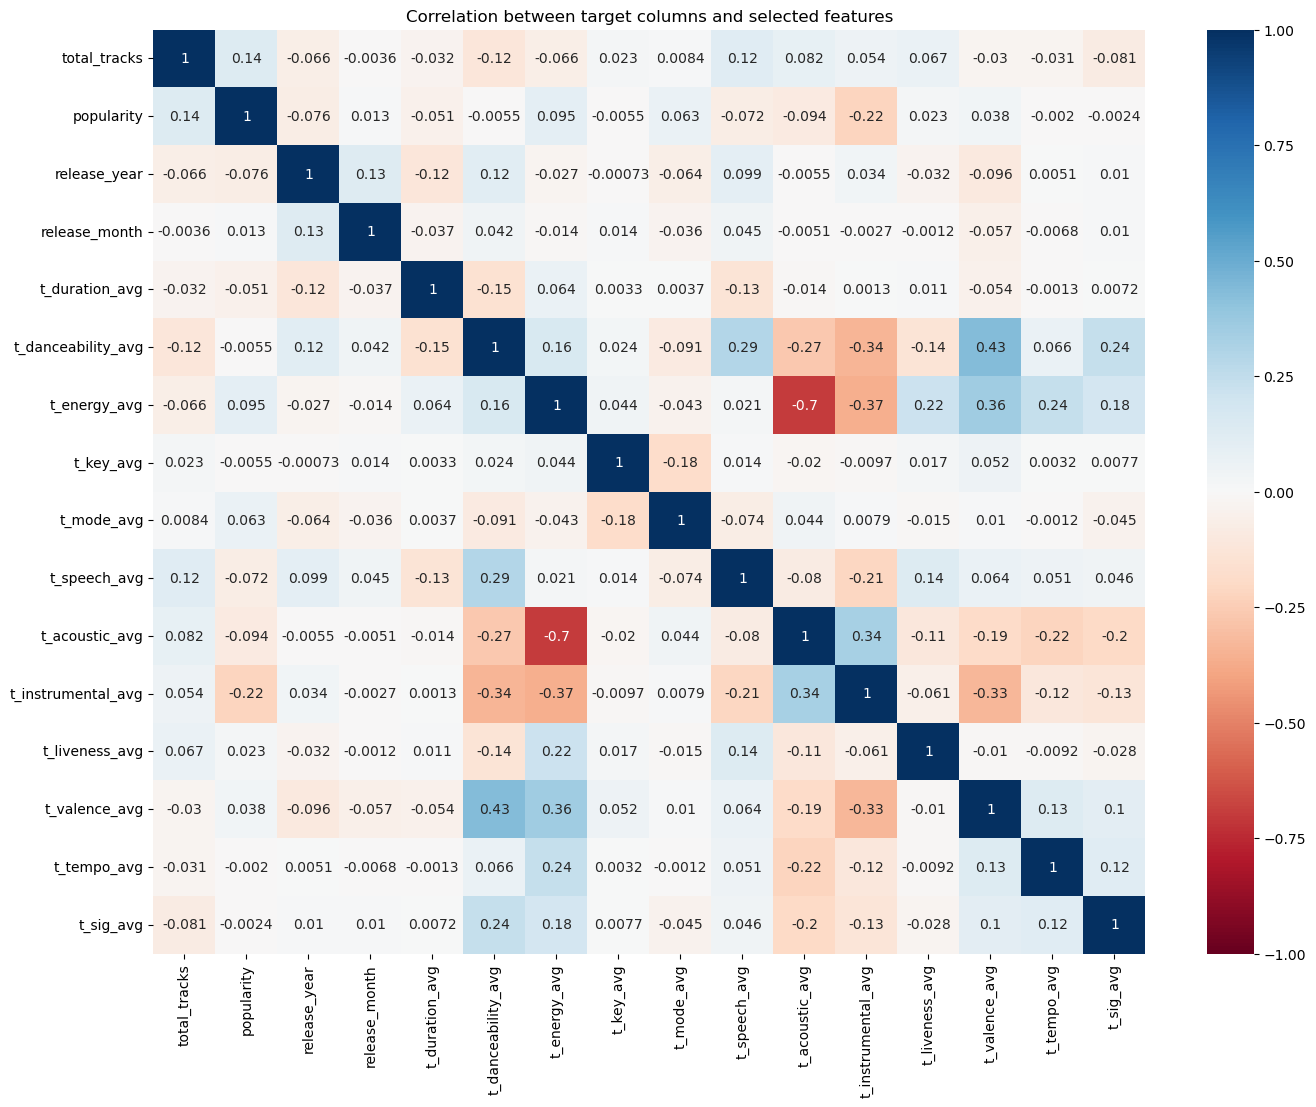

In [57]:
# Study the correlation between high-correlated features and our target column - populairty
corr_1 = new_train_df.drop('id', axis = 1).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_1, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title("Correlation between target columns and selected features")
plt.show()

In [58]:
new_train_df.head()

id  total_tracks  popularity  release_year  release_month  t_duration_avg  \
0   0             7          51          2021              9   192284.000000   
1   1            18          67          2019             11   195199.666667   
2   2            14          81          2017              4   154768.333333   
3   3            11          53          1996              1   203866.333333   
4   4             4          70          2018              5   140693.000000   

   t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  t_speech_avg  \
0            0.536667      0.458667   3.666667    0.666667      0.048967   
1            0.779000      0.658333   4.333333    0.000000      0.202100   
2            0.555000      0.487000   3.333333    0.666667      0.272667   
3            0.628333      0.585000   6.333333    1.000000      0.027467   
4            0.638000      0.302333   3.666667    1.000000      0.071500   

   t_acoustic_avg  t_instrumental_avg  t_liveness_avg  t_valence_avg  \
0        0.490333        9.200000e-06        0.091233       0.779000   
1        0.109367        3.207000e-04        0.114333       0.413333   
2        0.240847        2.863511e-02        0.286733       0.521333   
3        0.333333        8.166667e-07        0.203333       0.556333   
4        0.711333        1.058667e-05        0.270667       0.533000   

   t_tempo_avg  t_sig_avg  
0   133.243333   3.333333  
1   139.028000   4.000000  
2   122.268667   4.000000  
3   114.783333   4.000000  
4   116.460000   4.000000

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [234]:
# Create training_data and testing_data from new_train_df
training_data, testing_data = train_test_split(new_train_df, test_size=0.2, random_state=25)

In [235]:
# Check training and testing datasets's shapes
training_data.shape, testing_data.shape

((127954, 17), (31989, 17))

In [236]:
# Create X_train, X_test, y_train, y_test from the training_df dataset only
X_train, X_valid, y_train, y_valid = train_test_split(training_data.drop(columns = ['id', 'popularity'], axis = 1), 
                                                      training_data['popularity'], 
                                                      test_size = 0.2, shuffle = True, random_state = 42)

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [132]:
X_train

total_tracks  release_year  release_month  t_duration_avg  \
127596            12          2019              8   194679.666667   
65867             10          2018              3   148764.666667   
108163             1          2021              6   198752.000000   
460                3          2019             12    90272.000000   
21943              1          2021              1    97624.000000   
...              ...           ...            ...             ...   
133153             1          2021              3   131404.000000   
65327             20          2020              8   195109.333333   
27782             30          2017              9   149765.666667   
42550              8          2019             12   208541.666667   
90832             11          2014              1   187426.333333   

        t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  t_speech_avg  \
127596            0.690333      0.543667   5.666667    0.333333      0.062267   
65867             0.707000      0.518000   7.333333    0.333333      0.113233   
108163            0.605000      0.535000   6.000000    0.000000      0.072200   
460               0.638000      0.413667   5.666667    1.000000      0.529333   
21943             0.407000      0.017800   4.000000    1.000000      0.084300   
...                    ...           ...        ...         ...           ...   
133153            0.942000      0.946000   8.000000    1.000000      0.144000   
65327             0.647333      0.663667   4.666667    0.666667      0.205000   
27782             0.727333      0.615333   5.000000    1.000000      0.141133   
42550             0.631333      0.796333   7.333333    0.666667      0.041200   
90832             0.609333      0.911000   3.000000    1.000000      0.035133   

        t_acoustic_avg  t_instrumental_avg  t_liveness_avg  t_valence_avg  \
127596        0.025647        4.209000e-04        0.112833       0.602333   
65867         0.246593        2.472000e-02        0.179333       0.568333   
108163        0.021600        0.000000e+00        0.186000       0.392000   
460           0.635000        8.700000e-07        0.084433       0.723333   
21943         0.995000        9.470000e-01        0.098500       0.442000   
...                ...                 ...             ...            ...   
133153        0.041600        1.780000e-01        0.198000       0.744000   
65327         0.014970        0.000000e+00        0.127533       0.202333   
27782         0.199500        0.000000e+00        0.309333       0.613333   
42550         0.007110        0.000000e+00        0.108700       0.772667   
90832         0.020650        3.944767e-03        0.170933       0.735667   

        t_tempo_avg  t_sig_avg  
127596   126.309333   3.666667  
65867    109.909333   4.000000  
108163   171.818000   4.000000  
460       81.050333   4.000000  
21943     62.191000   3.000000  
...             ...        ...  
133153   120.964000   4.000000  
65327    156.844333   4.000000  
27782    119.010333   3.666667  
42550    112.324333   3.666667  
90832    106.673333   4.000000  

[102363 rows x 15 columns]

### Linear Regression

In [237]:
cross_val_score(LinearRegression(), X_train, y_train, scoring = 'r2', cv = folds)

array([0.10126748, 0.11354264, 0.10900169, 0.11424666, 0.10799848])

In [238]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the validation X_val
y_valid_pred = lr.predict(X_valid)
y_valid_pred

array([44.95374902, 27.14458896, 47.43380716, ..., 39.70755954,
       50.24621691, 37.18664738])

In [239]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the validation X_val
y_valid_pred = lr.predict(X_valid)
y_valid_pred

# Compare the result of y_val_pred with y_val
print("Mean Absolute Error: ", mean_absolute_error(y_valid, y_valid_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_valid, y_valid_pred), end = '\n')
print("R2 Score: ", r2_score(y_valid, y_valid_pred))

Mean Absolute Error:  17.7947255269748
Mean Squared Error:  456.9998483835792
R2 Score:  0.10130503484668762


In [240]:
import scipy

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x= y_valid,
                                                       y= y_valid_pred)

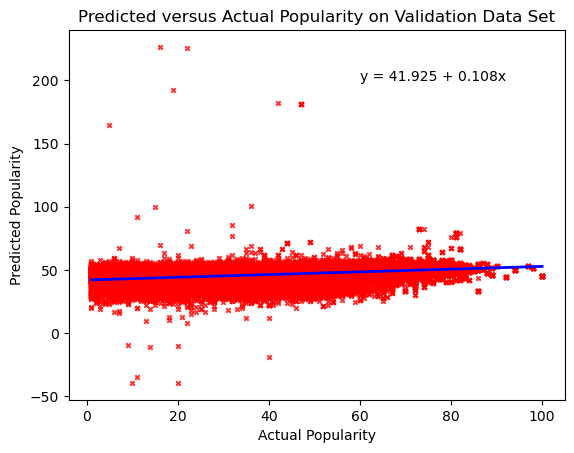

In [243]:
sns.regplot(x = y_valid, y = y_valid_pred, color = 'r', marker='x', scatter_kws={'s':10}, line_kws={'lw': 2, 'color': 'b'})

plt.title('Predicted versus Actual Popularity on Validation Data Set')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

#add regression equation to plot
plt.text(60, 200, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
plt.show()

<div class="alert alert-block alert-warning">
<b>Notes for Linear Regression model: </b> 

The result is showing that Linear Regression is too simple for this kind of problem. The r2 score is only 10% and the mean squared error is up to 457 indicating that the predicted value and true value is different from each other. This is the reason why we need to think of some other models which is more complicated to tackle this issue and predict successfully our popularity column.
</div>

### Decision Tree Regressor

In [100]:
DT_Model = DecisionTreeRegressor()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)

print("Mean Absolute Error: ", mean_absolute_error(y_valid, DT_Predict), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_valid, DT_Predict), end = '\n')

DT_Accuracy = r2_score(y_valid, DT_Predict)
print("R2 Score: " + str(DT_Accuracy))

Mean Absolute Error:  7.467132931554437
Mean Squared Error:  219.7174388613749
R2 Score: 0.5679233663654026


In [101]:
import scipy

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x= y_valid,
                                                       y= DT_Predict)

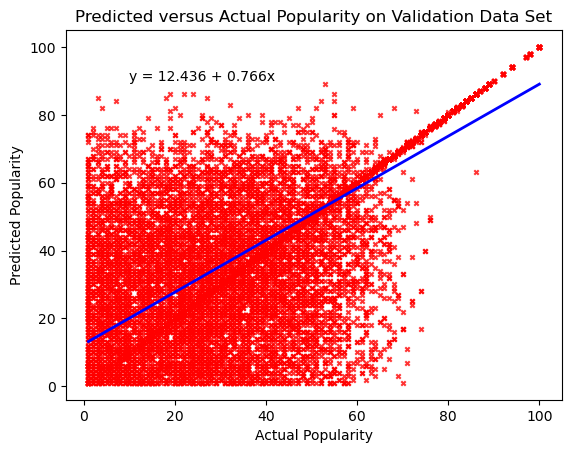

In [102]:
sns.regplot(x = y_valid, y = DT_Predict, color = 'r', marker='x', scatter_kws={'s':10}, line_kws={'lw': 2, 'color': 'b'})

plt.title('Predicted versus Actual Popularity on Validation Data Set')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

#add regression equation to plot
plt.text(10, 90, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
plt.show()

### Random Forest Regressor

In [135]:
RFC_Model = RandomForestRegressor()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)

print("Mean Absolute Error: ", mean_absolute_error(y_valid, RFC_Predict), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_valid, RFC_Predict), end = '\n')

RFC_Accuracy = r2_score(y_valid, RFC_Predict)
print("R2 Score: " + str(RFC_Accuracy))

Mean Absolute Error:  5.858369933289424
Mean Squared Error:  112.30581857238471
R2 Score: 0.7791494372144522


In [104]:
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x= y_valid,
                                                       y= RFC_Predict)

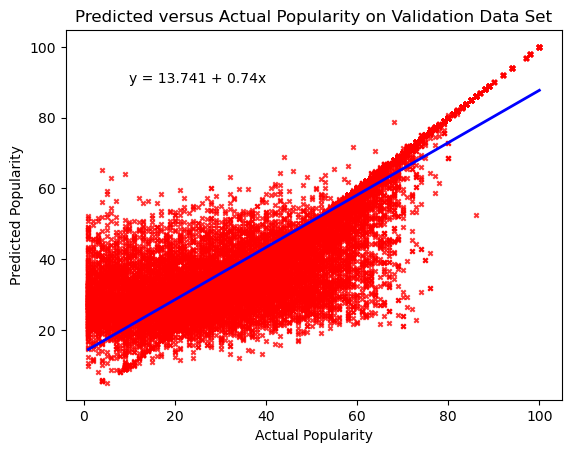

In [105]:
sns.regplot(x = y_valid, y = RFC_Predict, color = 'r', marker='x', scatter_kws={'s':10}, line_kws={'lw': 2, 'color': 'b'})

plt.title('Predicted versus Actual Popularity on Validation Data Set')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

#add regression equation to plot
plt.text(10, 90, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
plt.show()

### KNeighbors Regressor

In [106]:
KNN_Model = KNeighborsRegressor(n_neighbors=8)
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)

print("Mean Absolute Error: ", mean_absolute_error(y_valid, KNN_Predict), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_valid, KNN_Predict), end = '\n')

KNN_Accuracy = r2_score(y_valid, KNN_Predict)
print("R2 Score: " + str(KNN_Accuracy))

Mean Absolute Error:  9.569946465554297
Mean Squared Error:  245.00105017388927
R2 Score: 0.5182028811883961


In [107]:
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x= y_valid,
                                                       y= KNN_Predict)

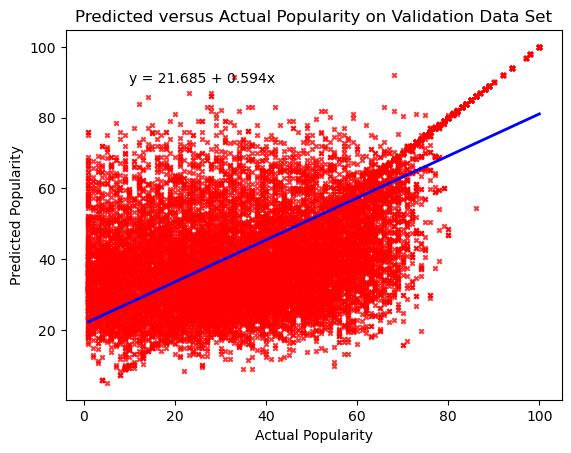

In [108]:
sns.regplot(x = y_valid, y = KNN_Predict, color = 'r', marker='x', scatter_kws={'s':10}, line_kws={'lw': 2, 'color': 'b'})

plt.title('Predicted versus Actual Popularity on Validation Data Set')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

#add regression equation to plot
plt.text(10, 90, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
plt.show()

### XGB Regressor

In [109]:
XGB_Model = XGBRegressor(n_estimators = 10, seed = 123)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_valid)

print("Mean Absolute Error: ", mean_absolute_error(y_valid, XGB_Predict), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_valid, XGB_Predict), end = '\n')

XGB_Accuracy = r2_score(y_valid, XGB_Predict)
print("R2 Score: " + str(XGB_Accuracy))

Mean Absolute Error:  14.398757110432626
Mean Squared Error:  311.6554195658508
R2 Score: 0.38712636904096387


### Polynomial  Regression

In [77]:
new_train_df.head(2)

id  total_tracks  popularity  release_year  release_month  t_duration_avg  \
0   0             7          51          2021              9   192284.000000   
1   1            18          67          2019             11   195199.666667   

   t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  t_speech_avg  \
0            0.536667      0.458667   3.666667    0.666667      0.048967   
1            0.779000      0.658333   4.333333    0.000000      0.202100   

   t_acoustic_avg  t_instrumental_avg  t_liveness_avg  t_valence_avg  \
0        0.490333            0.000009        0.091233       0.779000   
1        0.109367            0.000321        0.114333       0.413333   

   t_tempo_avg  t_sig_avg  
0   133.243333   3.333333  
1   139.028000   4.000000

In [78]:
# Create polynomial features

from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(new_train_df.drop(columns = ['id', 'popularity'], axis = 1))
poly_features.shape

(159943, 135)

In [79]:
# Create training and validation datasets for only polynomial regression
X_train1, X_test1, y_train1, y_test1 = train_test_split(poly_features, new_train_df['popularity'], test_size=0.3, random_state=101)

In [80]:
# Fit a linear regression mode on the training data
poly_model = LinearRegression(fit_intercept=True)
poly_model.fit(X_train1,y_train1)

LinearRegression()

In [81]:
poly_predict = poly_model.predict(X_test1)

MAE = mean_absolute_error(y_test1,poly_predict)
MSE = mean_squared_error(y_test1,poly_predict)
RMSE = np.sqrt(MSE)
poly_score = r2_score(y_test1, poly_predict)

print("Mean Absolute Error: ", MAE, end = '\n')
print("Mean Squared Error: ", MSE, end = '\n')
print("R2 Score: " + str(poly_score))

Mean Absolute Error:  16.086159018252427
Mean Squared Error:  415.21108178145147
R2 Score: 0.1874226253870741


In [82]:
# TRAINING ERROR PER DEGREE
train_r2_score = []
# TEST ERROR PER DEGREE
test_r2_score = []

for d in range(1,5):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(new_train_df.drop(columns = ['id', 'popularity'], axis = 1))

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, new_train_df['popularity'], test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_r2 = r2_score(y_train,train_pred)

    # Errors on Test Set
    test_r2 = r2_score(y_test,test_pred)

    # Append errors to lists for plotting later

    train_r2_score.append(train_r2)
    test_r2_score.append(test_r2)

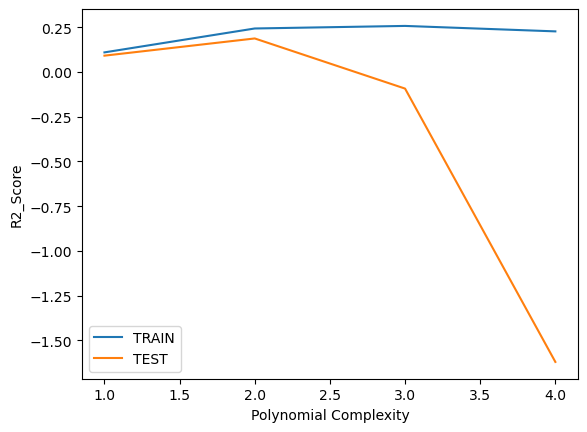

In [83]:
plt.plot(range(1,5),train_r2_score[:4],label='TRAIN')
plt.plot(range(1,5),test_r2_score[:4],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("R2_Score")
plt.legend()

In [136]:
model_performance_accuracy = pd.DataFrame({'Model': ['Linear Regression', 
                                                      'RandomForest Regressor', 
                                                      'KNeighbors Regressor',
                                                      'DecisionTree Regressor',
                                                      'XGB Regressor',
                                                      'PolynomialRegression'],
                                            'Accuracy': [r2_score(y_valid, y_valid_pred),
                                                         r2_score(y_valid, RFC_Predict),
                                                         r2_score(y_valid, KNN_Predict),
                                                         r2_score(y_valid, DT_Predict),
                                                         r2_score(y_valid, XGB_Predict),
                                                         poly_score],
                                          'Mean Squared Error': [mean_squared_error(y_valid, y_valid_pred),
                                                         mean_squared_error(y_valid, RFC_Predict),
                                                         mean_squared_error(y_valid, KNN_Predict),
                                                         mean_squared_error(y_valid, DT_Predict),
                                                         mean_squared_error(y_valid, XGB_Predict),
                                                         MSE]})

model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

Model  Accuracy  Mean Squared Error
1  RandomForest Regressor  0.779149          112.305819
3  DecisionTree Regressor  0.567923          219.717439
2    KNeighbors Regressor  0.518203          245.001050
4           XGB Regressor  0.387126          311.655420
5    PolynomialRegression  0.187423          415.211082
0       Linear Regression  0.101305          456.999848

<div class="alert alert-block alert-warning">
<b>Notes: </b> 

After conducting some more complicated models to tackle the popularity problem, we are receiving some higher results regarding the r2 score and Mean Squared Error Metric (Our main performance indicator). From the resul table above, we decided to choose **Random Forest Regressor** to be the model and try to improve the performance by hyperparameter tuning and feature importances
</div>

#### Apply the learning model on test dataset

In [137]:
# Create X_test, y_test from the test_df dataset only
X_test, y_test = testing_data.drop(columns = ['id', 'popularity'], axis = 1), testing_data['popularity']

In [138]:
# Using trained model to predict the Test Data Set
import time
start1 = time.time()
y_test_pred = RFC_Model.predict(X_test)
end1 = time.time()
print("Time for 1 frame=",(end1-start1)) # lets say n_frames = 50

Time for 1 frame= 0.9854128360748291


In [139]:
# Compare the result of y_test_pred with y_test
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_test_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_test, y_test_pred), end = '\n')
print("R2 Score: ", r2_score(y_test, y_test_pred))

Mean Absolute Error:  5.780445833017236
Mean Squared Error:  110.50799698408856
R2 Score:  0.7818307010018519


In [140]:
test_df_result = testing_data.copy()
test_df_result['predicted popularity'] = y_test_pred
test_df_result

id  total_tracks  popularity  release_year  release_month  \
96786    96786            11          73          2016              8   
109892  109892             4          14          2016             12   
82652    82652            13           4          2020             12   
56054    56054            18          68          1997             10   
107844  107844            26          84          2018              8   
...        ...           ...         ...           ...            ...   
80194    80194             1          18          2020             10   
66211    66211            13          13          2015             10   
32324    32324            13          30          2016              9   
47833    47833             1          30          2016              7   
13969    13969            10          72          1973              3   

        t_duration_avg  t_danceability_avg  t_energy_avg  t_key_avg  \
96786    251869.333333            0.696333      0.559000   5.000000   
109892   233198.000000            0.720000      0.932000   8.666667   
82652    123342.666667            0.348000      0.991333   6.333333   
56054    157470.666667            0.442667      0.968667   6.333333   
107844   243514.000000            0.569000      0.761000   3.666667   
...                ...                 ...           ...        ...   
80194    116088.000000            0.984000      0.327000   7.000000   
66211    242999.666667            0.616000      0.760333   7.000000   
32324    228928.666667            0.623333      0.786667   2.000000   
47833    163750.000000            0.361000      0.005110   9.000000   
13969    153410.666667            0.470333      0.319200   6.333333   

        t_mode_avg  t_speech_avg  t_acoustic_avg  t_instrumental_avg  \
96786     0.333333      0.059833        0.228900            0.073869   
109892    0.000000      0.053900        0.199667            0.000000   
82652     0.333333      0.129933        0.000103            0.016937   
56054     0.666667      0.084000        0.001591            0.010332   
107844    0.666667      0.125133        0.309900            0.000000   
...            ...           ...             ...                 ...   
80194     1.000000      0.205000        0.013600            0.000001   
66211     0.666667      0.038500        0.021703            0.000046   
32324     0.333333      0.107433        0.052597            0.006189   
47833     0.000000      0.074000        0.996000            0.951000   
13969     0.666667      0.044433        0.467667            0.825667   

        t_liveness_avg  t_valence_avg  t_tempo_avg  t_sig_avg  \
96786         0.232000       0.683667   118.663667   4.000000   
109892        0.147200       0.868000   112.686333   4.000000   
82652         0.157300       0.251367   117.162667   4.000000   
56054         0.201333       0.686000   142.486333   4.000000   
107844        0.133400       0.395333   105.581333   4.333333   
...                ...            ...          ...        ...   
80194         0.077200       0.181000   120.008000   4.000000   
66211         0.095800       0.503333   112.966000   4.000000   
32324         0.107433       0.447333   108.689667   4.000000   
47833         0.107000       0.183000    68.541000   4.000000   
13969         0.118333       0.142067   137.683333   4.000000   

        predicted popularity  
96786              73.000000  
109892             28.290000  
82652              28.975000  
56054              68.000000  
107844             84.000000  
...                      ...  
80194              24.180000  
66211              49.533333  
32324              55.664984  
47833              35.570000  
13969              72.000000  

[31989 rows x 18 columns]

<div class="alert alert-block alert-success">
<b>Conclusion:</b> 
    
In this case:
- We are trying to predict the popularity of the music albums 
- After pre-processing and analytical steps, we have been using many different models and decided to choose RandomForest Regressor
- We also used cross-validation with k = 5
- We got **78.18%** for the model accuracy on predicting Popularity and MSE is about 110.5

    
Performance Metrics on Test dataset:
- Mean Absolute Error:  5.780445833017236
- Mean Squared Error:  110.50799698408856
- R2 Score:  0.7818307010018519

**Further Strategies**
- We are going to do scaling features, feature importances, PCA and Hyperparameters for our Random Forest to see any improvement of the model. We will judge the performance by comparing the r2 score and mean squared error to judge all cases
</div>

### Scaling features

In [202]:
new_train_df.reset_index(inplace = True)
new_train_df.head()

index  id  total_tracks  popularity  release_year  release_month  \
0      0   0             7          51          2021              9   
1      1   1            18          67          2019             11   
2      2   2            14          81          2017              4   
3      3   3            11          53          1996              1   
4      4   4             4          70          2018              5   

   t_duration_avg  t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  \
0   192284.000000            0.536667      0.458667   3.666667    0.666667   
1   195199.666667            0.779000      0.658333   4.333333    0.000000   
2   154768.333333            0.555000      0.487000   3.333333    0.666667   
3   203866.333333            0.628333      0.585000   6.333333    1.000000   
4   140693.000000            0.638000      0.302333   3.666667    1.000000   

   t_speech_avg  t_acoustic_avg  t_instrumental_avg  t_liveness_avg  \
0      0.048967        0.490333        9.200000e-06        0.091233   
1      0.202100        0.109367        3.207000e-04        0.114333   
2      0.272667        0.240847        2.863511e-02        0.286733   
3      0.027467        0.333333        8.166667e-07        0.203333   
4      0.071500        0.711333        1.058667e-05        0.270667   

   t_valence_avg  t_tempo_avg  t_sig_avg  
0       0.779000   133.243333   3.333333  
1       0.413333   139.028000   4.000000  
2       0.521333   122.268667   4.000000  
3       0.556333   114.783333   4.000000  
4       0.533000   116.460000   4.000000

In [203]:
new_train_df.columns

Index(['index', 'id', 'total_tracks', 'popularity', 'release_year',
       'release_month', 't_duration_avg', 't_danceability_avg', 't_energy_avg',
       't_key_avg', 't_mode_avg', 't_speech_avg', 't_acoustic_avg',
       't_instrumental_avg', 't_liveness_avg', 't_valence_avg', 't_tempo_avg',
       't_sig_avg'],
      dtype='object')

In [204]:
from sklearn import preprocessing

# Create scale_training_df for scaling selected features
scale_traning_df = new_train_df.drop(['index','id'], axis = 1)
scale_traning_df

total_tracks  popularity  release_year  release_month  t_duration_avg  \
0                  7          51          2021              9   192284.000000   
1                 18          67          2019             11   195199.666667   
2                 14          81          2017              4   154768.333333   
3                 11          53          1996              1   203866.333333   
4                  4          70          2018              5   140693.000000   
...              ...         ...           ...            ...             ...   
159938            16          28          2009              1   145973.000000   
159939             1          50          2021              8   161061.000000   
159940            11          68          2021              4   175061.666667   
159941             1          41          2021              6   134265.000000   
159942             1          34          2021              4   126545.000000   

        t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  t_speech_avg  \
0                 0.536667      0.458667   3.666667    0.666667      0.048967   
1                 0.779000      0.658333   4.333333    0.000000      0.202100   
2                 0.555000      0.487000   3.333333    0.666667      0.272667   
3                 0.628333      0.585000   6.333333    1.000000      0.027467   
4                 0.638000      0.302333   3.666667    1.000000      0.071500   
...                    ...           ...        ...         ...           ...   
159938            0.578333      0.070033   3.333333    1.000000      0.056033   
159939            0.809000      0.836000   2.000000    0.000000      0.061900   
159940            0.492333      0.669667   5.333333    1.000000      0.029967   
159941            0.888000      0.653000   2.000000    1.000000      0.049000   
159942            0.594000      0.411000   5.000000    1.000000      0.044800   

        t_acoustic_avg  t_instrumental_avg  t_liveness_avg  t_valence_avg  \
0             0.490333        9.200000e-06        0.091233       0.779000   
1             0.109367        3.207000e-04        0.114333       0.413333   
2             0.240847        2.863511e-02        0.286733       0.521333   
3             0.333333        8.166667e-07        0.203333       0.556333   
4             0.711333        1.058667e-05        0.270667       0.533000   
...                ...                 ...             ...            ...   
159938        0.964000        6.246667e-01        0.091167       0.107967   
159939        0.056300        1.690000e-06        0.251000       0.721000   
159940        0.224834        1.318333e-05        0.180000       0.470000   
159941        0.184000        6.310000e-06        0.109000       0.728000   
159942        0.855000        8.520000e-01        0.127000       0.317000   

        t_tempo_avg  t_sig_avg  
0        133.243333   3.333333  
1        139.028000   4.000000  
2        122.268667   4.000000  
3        114.783333   4.000000  
4        116.460000   4.000000  
...             ...        ...  
159938   110.053333   4.000000  
159939   118.084000   4.000000  
159940   123.433333   4.000000  
159941    95.021000   4.000000  
159942   109.984000   4.000000  

[159943 rows x 16 columns]

In [205]:
# We use Standard Scaler in this case to scale our features
scaler = preprocessing.StandardScaler().fit(scale_traning_df.drop(['popularity'], axis = 1))
scaler

StandardScaler()

In [206]:
# Scale the training dataset
X_scaled = scaler.transform(scale_traning_df.drop(['popularity'], axis = 1))
X_scaled

array([[-1.74083502e-01,  3.99515978e-01,  8.30396084e-01, ...,
         1.38260951e+00,  5.42000510e-01, -1.70730500e+00],
       [ 3.03951983e-01,  2.75752222e-01,  1.40895262e+00, ...,
        -3.14109133e-01,  7.89384253e-01,  2.66853193e-01],
       [ 1.30120898e-01,  1.51988466e-01, -6.15995244e-01, ...,
         1.87018342e-01,  7.26641994e-02,  2.66853193e-01],
       ...,
       [-2.52416608e-04,  3.99515978e-01, -6.15995244e-01, ...,
        -5.11718776e-02,  1.22471667e-01,  2.66853193e-01],
       [-4.34830130e-01,  3.99515978e-01, -3.74387132e-02, ...,
         1.14596598e+00, -1.09259391e+00,  2.66853193e-01],
       [-4.34830130e-01,  3.99515978e-01, -6.15995244e-01, ...,
        -7.61102466e-01, -4.52694821e-01,  2.66853193e-01]])

In [207]:
# Store the scaled training_df in a new dataframe
scaled_train_df = pd.DataFrame(X_scaled, columns = ('total_tracks', 'release_year', 'release_month',
       't_duration_avg', 't_danceability_avg', 't_energy_avg', 't_key_avg',
       't_mode_avg', 't_speech_avg', 't_acoustic_avg', 't_instrumental_avg',
       't_liveness_avg', 't_valence_avg', 't_tempo_avg', 't_sig_avg'))
scaled_train_df.head()

total_tracks  release_year  release_month  t_duration_avg  \
0     -0.174084      0.399516       0.830396       -0.128957   
1      0.303952      0.275752       1.408953       -0.097460   
2      0.130121      0.151988      -0.615995       -0.534218   
3     -0.000252     -1.147531      -1.483830       -0.003839   
4     -0.304457      0.213870      -0.326717       -0.686266   

   t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  t_speech_avg  \
0           -0.525741     -0.733668  -0.588681    0.151087     -0.656465   
1            0.986951      0.215973  -0.339227   -1.616869      0.606885   
2           -0.411301     -0.598911  -0.713408    0.151087      1.189059   
3            0.046460     -0.132810   0.409134    1.035065     -0.833840   
4            0.106801     -1.477211  -0.588681    1.035065     -0.470565   

   t_acoustic_avg  t_instrumental_avg  t_liveness_avg  t_valence_avg  \
0        0.765630           -0.496394       -0.801336       1.382610   
1       -0.626764           -0.495270       -0.617939      -0.314109   
2       -0.146218           -0.393138        0.750788       0.187018   
3        0.191811           -0.496424        0.088654       0.349421   
4        1.573362           -0.496389        0.623231       0.241152   

   t_tempo_avg  t_sig_avg  
0     0.542001  -1.707305  
1     0.789384   0.266853  
2     0.072664   0.266853  
3    -0.247449   0.266853  
4    -0.175746   0.266853

In [208]:
# Create y target column for new scaled dataset
scaled_train_df['popularity'] = scale_traning_df['popularity']
scaled_train_df.head()

total_tracks  release_year  release_month  t_duration_avg  \
0     -0.174084      0.399516       0.830396       -0.128957   
1      0.303952      0.275752       1.408953       -0.097460   
2      0.130121      0.151988      -0.615995       -0.534218   
3     -0.000252     -1.147531      -1.483830       -0.003839   
4     -0.304457      0.213870      -0.326717       -0.686266   

   t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  t_speech_avg  \
0           -0.525741     -0.733668  -0.588681    0.151087     -0.656465   
1            0.986951      0.215973  -0.339227   -1.616869      0.606885   
2           -0.411301     -0.598911  -0.713408    0.151087      1.189059   
3            0.046460     -0.132810   0.409134    1.035065     -0.833840   
4            0.106801     -1.477211  -0.588681    1.035065     -0.470565   

   t_acoustic_avg  t_instrumental_avg  t_liveness_avg  t_valence_avg  \
0        0.765630           -0.496394       -0.801336       1.382610   
1       -0.626764           -0.495270       -0.617939      -0.314109   
2       -0.146218           -0.393138        0.750788       0.187018   
3        0.191811           -0.496424        0.088654       0.349421   
4        1.573362           -0.496389        0.623231       0.241152   

   t_tempo_avg  t_sig_avg  popularity  
0     0.542001  -1.707305          51  
1     0.789384   0.266853          67  
2     0.072664   0.266853          81  
3    -0.247449   0.266853          53  
4    -0.175746   0.266853          70

In [209]:
# Create training_data and testing_data from scaled_training_df
training_data, testing_data = train_test_split(scaled_train_df, test_size=0.2, random_state=25)

In [210]:
# Create X_train, X_test, y_train, y_test from the scale_training_df dataset only
X_train1, X_val1, y_train1, y_val1 = train_test_split(training_data.drop('popularity', axis = 1), training_data['popularity'],
                                                      test_size = 0.2, shuffle = True, random_state = 42)


In [211]:
RFC_Model = RandomForestRegressor()
RFC_Model.fit(X_train1, y_train1)
RFC_Predict = RFC_Model.predict(X_val1)

print("Mean Absolute Error: ", mean_absolute_error(y_val1, RFC_Predict), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_val1, RFC_Predict), end = '\n')

RFC_Accuracy = r2_score(y_val1, RFC_Predict)
print("R2 Score: " + str(RFC_Accuracy))

Mean Absolute Error:  5.873232408137455
Mean Squared Error:  112.72343628594939
R2 Score: 0.7783281876279


#### Apply the model on the scaled test dataset

In [213]:
# Create X_test, y_test from the test_df dataset only
X_test1, y_test1 = testing_data.drop(columns = ['popularity'], axis = 1), testing_data['popularity']

In [215]:
# Using trained model to predict the Test Data Set
import time
start1 = time.time()
y_test_pred = RFC_Model.predict(X_test1)
end1 = time.time()
print("Time for 1 frame=",(end1-start1)) # lets say n_frames = 50

Time for 1 frame= 1.5506579875946045


In [216]:
# Compare the result of y_test_pred with y_test
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_test_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_test, y_test_pred), end = '\n')
print("R2 Score: ", r2_score(y_test, y_test_pred))

Mean Absolute Error:  5.7997338162136005
Mean Squared Error:  111.39245251882991
R2 Score:  0.7800845735787176


### Tuning

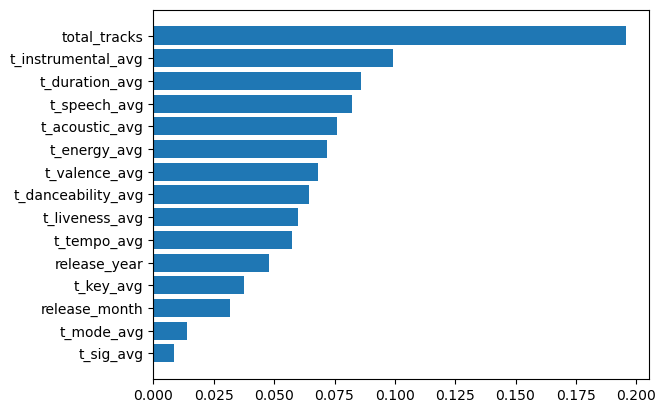

In [117]:
features = X_train.columns

f_i = list(zip(features,RFC_Model.feature_importances_)) 
f_i.sort(key = lambda x : x[1]) 
plt.barh([x[0] for x in f_i],[x[1] for x in f_i]) 
plt.show()

In [118]:
# Create X_train, X_test, y_train, y_test by using only features having the importance above 0.025
X_train, X_valid, y_train, y_valid = train_test_split(training_data.drop(columns = ['id', 'popularity', 't_mode_avg', 't_sig_avg'], axis = 1), 
                                                      training_data['popularity'], 
                                                      test_size = 0.2, shuffle = True, random_state = 42)

folds = KFold(n_splits = 3, shuffle = True, random_state = 42)

In [119]:
cross_val_score(RandomForestRegressor(), X_train, y_train, scoring = 'r2', cv = folds)

array([0.75783913, 0.74939474, 0.75235497])

In [120]:
RFC_Model = RandomForestRegressor()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)

print("Mean Absolute Error: ", mean_absolute_error(y_valid, RFC_Predict), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_valid, RFC_Predict), end = '\n')

RFC_Accuracy = r2_score(y_valid, RFC_Predict)
print("R2 Score: " + str(RFC_Accuracy))

Mean Absolute Error:  5.881260821795306
Mean Squared Error:  112.40426377611318
R2 Score: 0.7789558436952263


### Previous models with PCA

In [141]:
new_train_df.reset_index(inplace = True)

In [142]:
new_train_df.head()

index  id  total_tracks  popularity  release_year  release_month  \
0      0   0             7          51          2021              9   
1      1   1            18          67          2019             11   
2      2   2            14          81          2017              4   
3      3   3            11          53          1996              1   
4      4   4             4          70          2018              5   

   t_duration_avg  t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  \
0   192284.000000            0.536667      0.458667   3.666667    0.666667   
1   195199.666667            0.779000      0.658333   4.333333    0.000000   
2   154768.333333            0.555000      0.487000   3.333333    0.666667   
3   203866.333333            0.628333      0.585000   6.333333    1.000000   
4   140693.000000            0.638000      0.302333   3.666667    1.000000   

   t_speech_avg  t_acoustic_avg  t_instrumental_avg  t_liveness_avg  \
0      0.048967        0.490333        9.200000e-06        0.091233   
1      0.202100        0.109367        3.207000e-04        0.114333   
2      0.272667        0.240847        2.863511e-02        0.286733   
3      0.027467        0.333333        8.166667e-07        0.203333   
4      0.071500        0.711333        1.058667e-05        0.270667   

   t_valence_avg  t_tempo_avg  t_sig_avg  
0       0.779000   133.243333   3.333333  
1       0.413333   139.028000   4.000000  
2       0.521333   122.268667   4.000000  
3       0.556333   114.783333   4.000000  
4       0.533000   116.460000   4.000000

In [143]:
from sklearn.decomposition import PCA

# Number of Components
pca = PCA(n_components=5)

model = pca.fit(new_train_df.drop(columns = ['index','id', 'popularity']))
X_pc = model.transform(new_train_df.drop(columns = ['index','id', 'popularity']))

n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['total_tracks', 'release_year', 'release_month',
       't_duration_avg', 't_danceability_avg', 't_energy_avg', 't_key_avg',
       't_mode_avg', 't_speech_avg', 't_acoustic_avg', 't_instrumental_avg',
       't_liveness_avg', 't_valence_avg', 't_tempo_avg', 't_sig_avg']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [144]:
df.rename(columns = {0: 'Component', 1: 'Most important feature'}, inplace = True)
df['Variance Ratio'] = pd.Series((pca.explained_variance_ratio_)*100)
df

Component Most important feature  Variance Ratio
0       PC0         t_duration_avg    9.999998e+01
1       PC1            t_tempo_avg    6.507339e-06
2       PC2           total_tracks    6.074912e-06
3       PC3           release_year    2.975587e-06
4       PC4          release_month    1.369913e-07

In [145]:
pca_features = round(pd.DataFrame(abs( pca.components_ ), index = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4']
                           , columns = ('total_tracks', 'release_year', 'release_month',
       't_duration_avg', 't_danceability_avg', 't_energy_avg', 't_key_avg',
       't_mode_avg', 't_speech_avg', 't_acoustic_avg', 't_instrumental_avg',
       't_liveness_avg', 't_valence_avg', 't_tempo_avg', 't_sig_avg')),6)
pca_features

total_tracks  release_year  release_month  t_duration_avg  \
PC0      0.000008      0.000021       0.000001        1.000000   
PC1      0.538690      0.052165       0.000190        0.000003   
PC2      0.837125      0.079366       0.002297        0.000005   
PC3      0.094989      0.995071       0.028342        0.000022   
PC4      0.000745      0.028412       0.999175        0.000001   

     t_danceability_avg  t_energy_avg  t_key_avg  t_mode_avg  t_speech_avg  \
PC0            0.000000      0.000000   0.000000    0.000000      0.000000   
PC1            0.000842      0.002080   0.001113    0.000123      0.000092   
PC2            0.000526      0.000747   0.002566    0.000166      0.000663   
PC3            0.000816      0.000371   0.000513    0.001482      0.000759   
PC4            0.001184      0.000380   0.028553    0.003529      0.001027   

     t_acoustic_avg  t_instrumental_avg  t_liveness_avg  t_valence_avg  \
PC0        0.000000            0.000000        0.000000       0.000000   
PC1        0.002639            0.001447        0.000236       0.001142   
PC2        0.000640            0.000245        0.000296       0.000510   
PC3        0.000073            0.000723        0.000169       0.001464   
PC4        0.000581            0.000699        0.000122       0.002762   

     t_tempo_avg  t_sig_avg  
PC0     0.000000   0.000000  
PC1     0.840875   0.002098  
PC2     0.541211   0.000003  
PC3     0.000881   0.000002  
PC4     0.001094   0.001062

In [146]:
y = new_train_df['popularity']

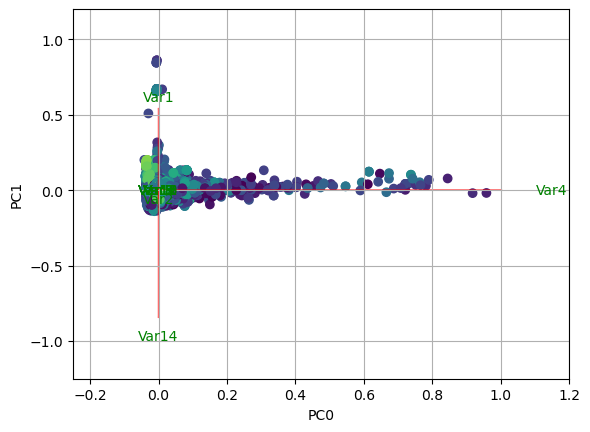

In [147]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-0.25,1.2)
plt.ylim(-1.25,1.2)
plt.xlabel("PC{}".format(0))
plt.ylabel("PC{}".format(1))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pc[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [148]:
# Create new feature df based on PCA result
pca_df = pd.DataFrame(X_pc, columns = ('PC0', 'PC1', 'PC2', 'PC3', 'PC4'))
pca_df[['id', 'popularity']] = new_train_df[['id', 'popularity']]
pca_df

PC0        PC1        PC2        PC3       PC4      id  \
0      -11937.730332 -13.187839   2.920004  -5.851164  2.645676       0   
1       -9022.063718 -12.015759  15.430346  -5.023387  4.724936       1   
2      -49453.396951  -0.092358   2.971507  -1.582799 -2.290526       2   
3        -355.396487   5.830583  -1.651920  18.601394 -4.575205       3   
4      -63528.730220  -0.687079  -8.698759  -1.352963 -1.321544       4   
...              ...        ...        ...        ...       ...     ...   
159938 -58248.730120  11.652480  -1.370993   6.453972 -5.083353  159995   
159939 -43160.730270  -3.770615 -10.472822  -4.582950  1.566313  159996   
159940 -29160.063683  -2.834419   0.884767  -5.721661 -2.329261  159997   
159941 -69956.730252  15.544177 -23.091098  -3.958618 -0.481508  159998   
159942 -77676.730252   2.947237 -15.022091  -3.722396 -2.383908  159999   

        popularity  
0               51  
1               67  
2               81  
3               53  
4               70  
...            ...  
159938          28  
159939          50  
159940          68  
159941          41  
159942          34  

[159943 rows x 7 columns]

In [149]:
# Create training_data and testing_data from new_train_df
pca_training_data, pca_testing_data = train_test_split(pca_df.drop('id', axis = 1), test_size=0.2, random_state=25)

In [158]:
# Create X_train, X_test, y_train, y_test from the training_df dataset only
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(pca_training_data.drop(columns = ['popularity'], axis = 1), 
                                                      pca_training_data['popularity'], 
                                                      test_size = 0.2, shuffle = True, random_state = 42)

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#### Linear Regression

In [159]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train2, y_train2)

# Predict the validation X_val
y_valid_pred = lr.predict(X_valid2)
y_valid_pred

# Compare the result of y_val_pred with y_val
print("Mean Absolute Error: ", mean_absolute_error(y_valid2, y_valid_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_valid2, y_valid_pred), end = '\n')
print("R2 Score: ", r2_score(y_valid2, y_valid_pred))

Mean Absolute Error:  18.850913346097915
Mean Squared Error:  497.56261605702935
R2 Score:  0.021537929431334923


#### Decision Tree Regressor

In [160]:
DT_Model = DecisionTreeRegressor()
DT_Model.fit(X_train2, y_train2)
DT_Predict = DT_Model.predict(X_valid2)
DT_Accuracy = r2_score(y_valid2, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))
print("Mean Squared Error: ", mean_squared_error(y_valid2, DT_Predict), end = '\n')

Accuracy: 0.529426812078867
Mean Squared Error:  239.29351322965147


#### Random Forest Regressor

In [223]:
RFC_Model = RandomForestRegressor()
RFC_Model.fit(X_train2, y_train2)
RFC_Predict = RFC_Model.predict(X_valid2)
RFC_Accuracy = r2_score(y_valid2, RFC_Predict)

print("R2 Score: " + str(RFC_Accuracy))
print("Mean Squared Error: ", mean_squared_error(y_valid2, RFC_Predict), end = '\n')
print("Mean Absolute Error: ", mean_absolute_error(y_valid2, RFC_Predict), end = '\n')

R2 Score: 0.7458136413501851
Mean Squared Error:  129.25756999687064
Mean Absolute Error:  6.317621544406768


#### KNeighbor Regressor

In [162]:
KNN_Model = KNeighborsRegressor(n_neighbors=8)
KNN_Model.fit(X_train2, y_train2)
KNN_Predict = KNN_Model.predict(X_valid2)
KNN_Accuracy = r2_score(y_valid2, KNN_Predict)

print("Accuracy: " + str(KNN_Accuracy))
print("Mean Squared Error: ", mean_squared_error(y_valid2, KNN_Predict), end = '\n')

Accuracy: 0.5183996470161647
Mean Squared Error:  244.90099180375913


#### XGB Regressor

In [163]:
XGB_Model = XGBRegressor(n_estimators = 10, seed = 123)
XGB_Model.fit(X_train2, y_train2)
XGB_Predict = XGB_Model.predict(X_valid2)
XGB_Accuracy = r2_score(y_valid2, XGB_Predict)

print("Accuracy: " + str(XGB_Accuracy))
print("Mean Squared Error: ", mean_squared_error(y_valid2, XGB_Predict), end = '\n')

Accuracy: 0.2901402071908663
Mean Squared Error:  360.97433530411655


In [175]:
model_pca_performance_accuracy = pd.DataFrame({'Model with PCA': ['Linear Regression', 
                                                      'RandomForest Regressor', 
                                                      'KNeighbors Regressor',
                                                      'DecisionTree Regressor',
                                                      'XGB Regressor'],
                                            'Accuracy': [r2_score(y_valid2, y_valid_pred),
                                                         r2_score(y_valid2, RFC_Predict),
                                                         r2_score(y_valid2, KNN_Predict),
                                                         r2_score(y_valid2, DT_Predict),
                                                         r2_score(y_valid2, XGB_Predict)],
                                          'Mean Squared Error': [mean_squared_error(y_valid2, y_valid_pred),
                                                         mean_squared_error(y_valid2, RFC_Predict),
                                                         mean_squared_error(y_valid2, KNN_Predict),
                                                         mean_squared_error(y_valid2, DT_Predict),
                                                         mean_squared_error(y_valid2, XGB_Predict)]})

model_pca_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

Model with PCA  Accuracy  Mean Squared Error
1  RandomForest Regressor  0.746130          129.096569
3  DecisionTree Regressor  0.529427          239.293513
2    KNeighbors Regressor  0.518400          244.900992
4           XGB Regressor  0.290140          360.974335
0       Linear Regression  0.021538          497.562616

#### Apply on the pca_testing_data using RandomForest Regressor

In [164]:
# Create X_test, y_test from the test_df dataset only
X_test2, y_test2 = pca_testing_data.drop(columns = ['popularity'], axis = 1), pca_testing_data['popularity']

In [169]:
# Using trained model to predict the Test Data Set
start2 = time.time()
y_test2_pred = RFC_Model.predict(X_test2)
end2 = time.time()
print("Time for 1 frame=",(end2-start2))

Time for 1 frame= 1.0364015102386475


In [166]:
# Compare the result of y_test_pred with y_test
print("Mean Absolute Error: ", mean_absolute_error(y_test2, y_test2_pred), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_test2, y_test2_pred), end = '\n')
print("R2 Score: ", r2_score(y_test2, y_test2_pred))

Mean Absolute Error:  6.217853747649272
Mean Squared Error:  125.33049975586711
R2 Score:  0.7525675243325413


### Hyperparameter tuning

In [217]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 70],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5,20]}

In [218]:
RFC2 = RandomForestRegressor()
cv = GridSearchCV(RFC2, param_grid=parameters, cv=3, scoring='r2', verbose=3)

In [219]:
cv.fit(X_train2, y_train2)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.354 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.364 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.367 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.387 total time=   7.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.373 total time=   7.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.378 total time=   7.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.377 total time=   2.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.363 total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.362 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.381 total time=   7.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.379 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.383 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.368 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.356 total time=   2.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.365 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.384 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.375 total time=   7.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.377 total time=   7.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.364 total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.365 total time=   1.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.368 total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.386 total time=   7.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.370 total time=   7.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.379 total time=   7.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.367 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.351 total time=   1.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.370 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.382 total time=   7.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.380 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.381 total time=   7.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.368 total time=   1.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.365 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.354 total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.388 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.379 total time=   7.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.373 total time=   7.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.363 total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.359 total time=   1.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.369 total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.379 total time=   7.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.373 total time=   7.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.379 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.369 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.359 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.364 total time=   1.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.386 total time=   7.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.374 total time=   7.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.376 total time=   8.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.368 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.365 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.355 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.382 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.374 total time=   7.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.379 total time=   6.9s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.332 total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.339 total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.326 total time=   0.7s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.344 total time=   3.2s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.351 total time=   3.0s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samp

[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.343 total time=   3.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.660 total time=   3.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.662 total time=   3.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.664 total time=   3.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.709 total time=  14.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.709 total time=  13.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.710 total time=  13.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.667 total time=   3.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.664 total time=   3.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.667 total time=   3.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.707 total time=  12.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.707 total time=  11.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.708 total time=  12.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.654 total time=   2.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.660 total time=   2.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.655 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.698 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.697 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.698 total time=   9.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.658 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.658 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.660 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.701 total time=   9.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.702 total time=   9.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.703 total time=   9.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.654 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.656 total time=   2.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.659 total time=   2.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.699 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.699 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.701 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.657 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.654 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.654 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.692 total time=   9.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.691 total time=   9.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.691 total time=   9.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.645 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.645 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.648 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.684 total time=   8.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.682 total time=   8.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.684 total time=   8.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.649 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.642 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.649 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.684 total time=   8.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.682 total time=   8.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.683 total time=   8.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.648 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.645 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.645 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.679 total time=   8.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.681 total time=   8.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.681 total time=   9.0s
[CV 1/3] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.664 total time=   1.1s
[CV 2/3] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.662 total time=   1.1s
[CV 3/3] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.667 total time=   1.2s
[CV 1/3] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.714 total time=   4.8s
[CV 2/3] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.714 total time=   4.8s
[CV 3/3] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samp

[CV 3/3] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.676 total time=   4.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.309 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.299 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.305 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.309 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.299 total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.305 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.309 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.299 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.305 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.309 total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.299 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.304 total time=   5.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.310 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.299 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.304 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.310 total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.299 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.304 total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.309 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.299 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.303 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.309 total time=   5.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.299 total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.303 total time=   5.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.309 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.299 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.303 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.309 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.299 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.303 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.309 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.300 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.303 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.310 total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.300 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.303 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.310 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.299 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.303 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.310 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.299 total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.303 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.310 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.299 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.303 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.310 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.299 total time=   5.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.303 total time=   5.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.311 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.299 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.303 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.311 total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.299 total time=   5.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.303 total time=   5.6s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.355 total time=   0.5s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.343 total time=   0.5s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.329 total time=   0.5s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.364 total time=   2.4s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.351 total time=   2.5s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, m

[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.353 total time=   2.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.519 total time=   2.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.511 total time=   2.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.516 total time=   2.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.523 total time=  10.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.516 total time=  10.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.522 total time=  10.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.523 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.518 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.522 total time=   2.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.527 total time=   9.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.521 total time=   9.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.525 total time=   9.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.539 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.530 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.538 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.540 total time=   9.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.530 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.540 total time=   9.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.518 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.520 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.517 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.521 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.521 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.519 total time=   9.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.524 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.523 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.520 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.525 total time=   9.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.524 total time=   9.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.523 total time=   9.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.538 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.535 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.536 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.539 total time=   9.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.536 total time=   9.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.537 total time=   9.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.541 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.533 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.538 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.541 total time=   9.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.533 total time=   9.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.538 total time=   9.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.540 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.534 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.537 total time=   2.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.541 total time=   8.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.534 total time=   9.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.538 total time=   9.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.544 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.538 total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.539 total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.544 total time=   8.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.538 total time=   8.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.540 total time=   8.9s
[CV 1/3] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.689 total time=   1.2s
[CV 2/3] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.686 total time=   1.2s
[CV 3/3] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.691 total time=   1.2s
[CV 1/3] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.728 total time=   4.8s
[CV 2/3] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.729 total time=   4.8s
[CV 3/3] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, m

[CV 3/3] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.706 total time=   4.2s


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 70],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 20]},
             scoring='r2', verbose=3)

In [220]:
cv.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

In [226]:
RFC_Model = RandomForestRegressor(bootstrap = False,
 max_depth=70,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split = 5,
 n_estimators= 20)
RFC_Model.fit(X_train2, y_train2)
RFC_Predict = RFC_Model.predict(X_valid2)
RFC_Accuracy = r2_score(y_valid2, RFC_Predict)

print("Mean Absolute Error: ", mean_absolute_error(y_valid2, RFC_Predict), end = '\n')
print("Mean Squared Error: ", mean_squared_error(y_valid2, RFC_Predict), end = '\n')
print("R2 Score: " + str(RFC_Accuracy))

Mean Absolute Error:  6.0084259396988
Mean Squared Error:  124.22515080732411
R2 Score: 0.755709946139307


<div class="alert alert-block alert-success">
<b>Conclusion:</b> 
    
After getting done all cases including Feature Scaling, Feature Importances, PCA and Hyperparameter Tuning, there is no significant changes on our performance indicators.

**RandomForest Regressor (Original) on training set**:
- Mean Absolute Error:  5.858369933289424
- Mean Squared Error:  112.30581857238471
- R2 Score: 0.7791494372144522
    
**RandomForest Regressor with Features Scaling:**
- Mean Absolute Error:  5.873232408137455
- Mean Squared Error:  112.72343628594939
- R2 Score: 0.7783281876279

**RandomForest Regressor with selected features having high importance:**
- Mean Absolute Error:  5.881260821795306
- Mean Squared Error:  112.40426377611318
- R2 Score: 0.7789558436952263
 
**RandomForest Regressor with Principal Component Analysis:**
- Mean Absolute Error:  6.317621544406768
- Mean Squared Error:  129.25756999687064
- R2 Score: 0.7458136413501851
    
**RandomForest Regressor with PCA and the optimal set of hyperparameters:**
- Mean Absolute Error:  6.0084259396988
- Mean Squared Error:  124.22515080732411
- R2 Score: 0.755709946139307
    
Therefore, we decided to stay with the normal Random Forest Regressor on the original training data and apply on the test data:
- **Mean Absolute Error:  5.780445833017236**
- **Mean Squared Error:  110.50799698408856**
- **R2 Score:  0.7818307010018519**

    
**Further Strategies**
- We understand our case that there is not enough information for us to predict the popularity of the music albums based on the albums' characteristics alone. The Spotify API is actually using the number of likes and the number of playback on those albums to calculate the popularity scores. Therefore, we need to find other sources of data and combine with this current dataset to further anylyze the trends as well as predict successfully the popularity scores.
</div>